Привет, Валерий!

Меня зовут Вячеслав Погорелый, и я буду проводить ревью твоего проекта. 

Предлагаю перейти на "ты", если не против)

Но если это не удобно - дай знать, и мы перейдем на "вы". Моя главная задача — не находить сделанные тобою ошибки, а передать свой опыт и помочь тебе стать аналитиком данных.

Я отметил комментарии и замечания разным цветом далее по тексту markdown:

---    
<div class="alert alert-block alert-danger">
    
### Ошибка
    
Критическое замечание, которые следует исправить.
</div> 
    
---
    
<div class="alert alert-block alert-warning">
    
### Совет
    
Замечание\совет на будущее.
</div>
    
---
    
<div class="alert alert-block alert-success">
    
### Успех
    
Когда всё сделано правильно.
</div>
    
    
    
Будет здорово, если для ответов ты выберешь любой **<font color="maroon">читабельный и заметный цвет</font>**, так мне будет проще все проверить.


При доработке проекта попрошу тебя сохранить и не видоизменять заметки ревьюера, это осложняет повторную проверку.

<div class="alert alert-block alert-success">
 
# Итоговый Комментарий ревьюера ver.2 
    
#### Успех
    
Спасибо тебе за доработку проекта. Вот теперь я его могу принять. Ты отлично постарался и я желаю тебе успехов в дальнешей учебе. Ты точно справишься:) 

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Спасибо тебе за оформление оглавления к проекту. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
#pip install missingno

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno

#### Загрузим данные из файла в датафрейм.

In [3]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
#data = pd.read_csv('D:\\Python\\New_Project\\real_estate_data.csv', sep='\t')

#### Изучим общую информацию о полученном датафрейме.

In [4]:
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Отлично. Проект сохранен в переменные и получена первичная информация. 

#### Построим общую гистограмму для всех числовых столбцов таблицы.

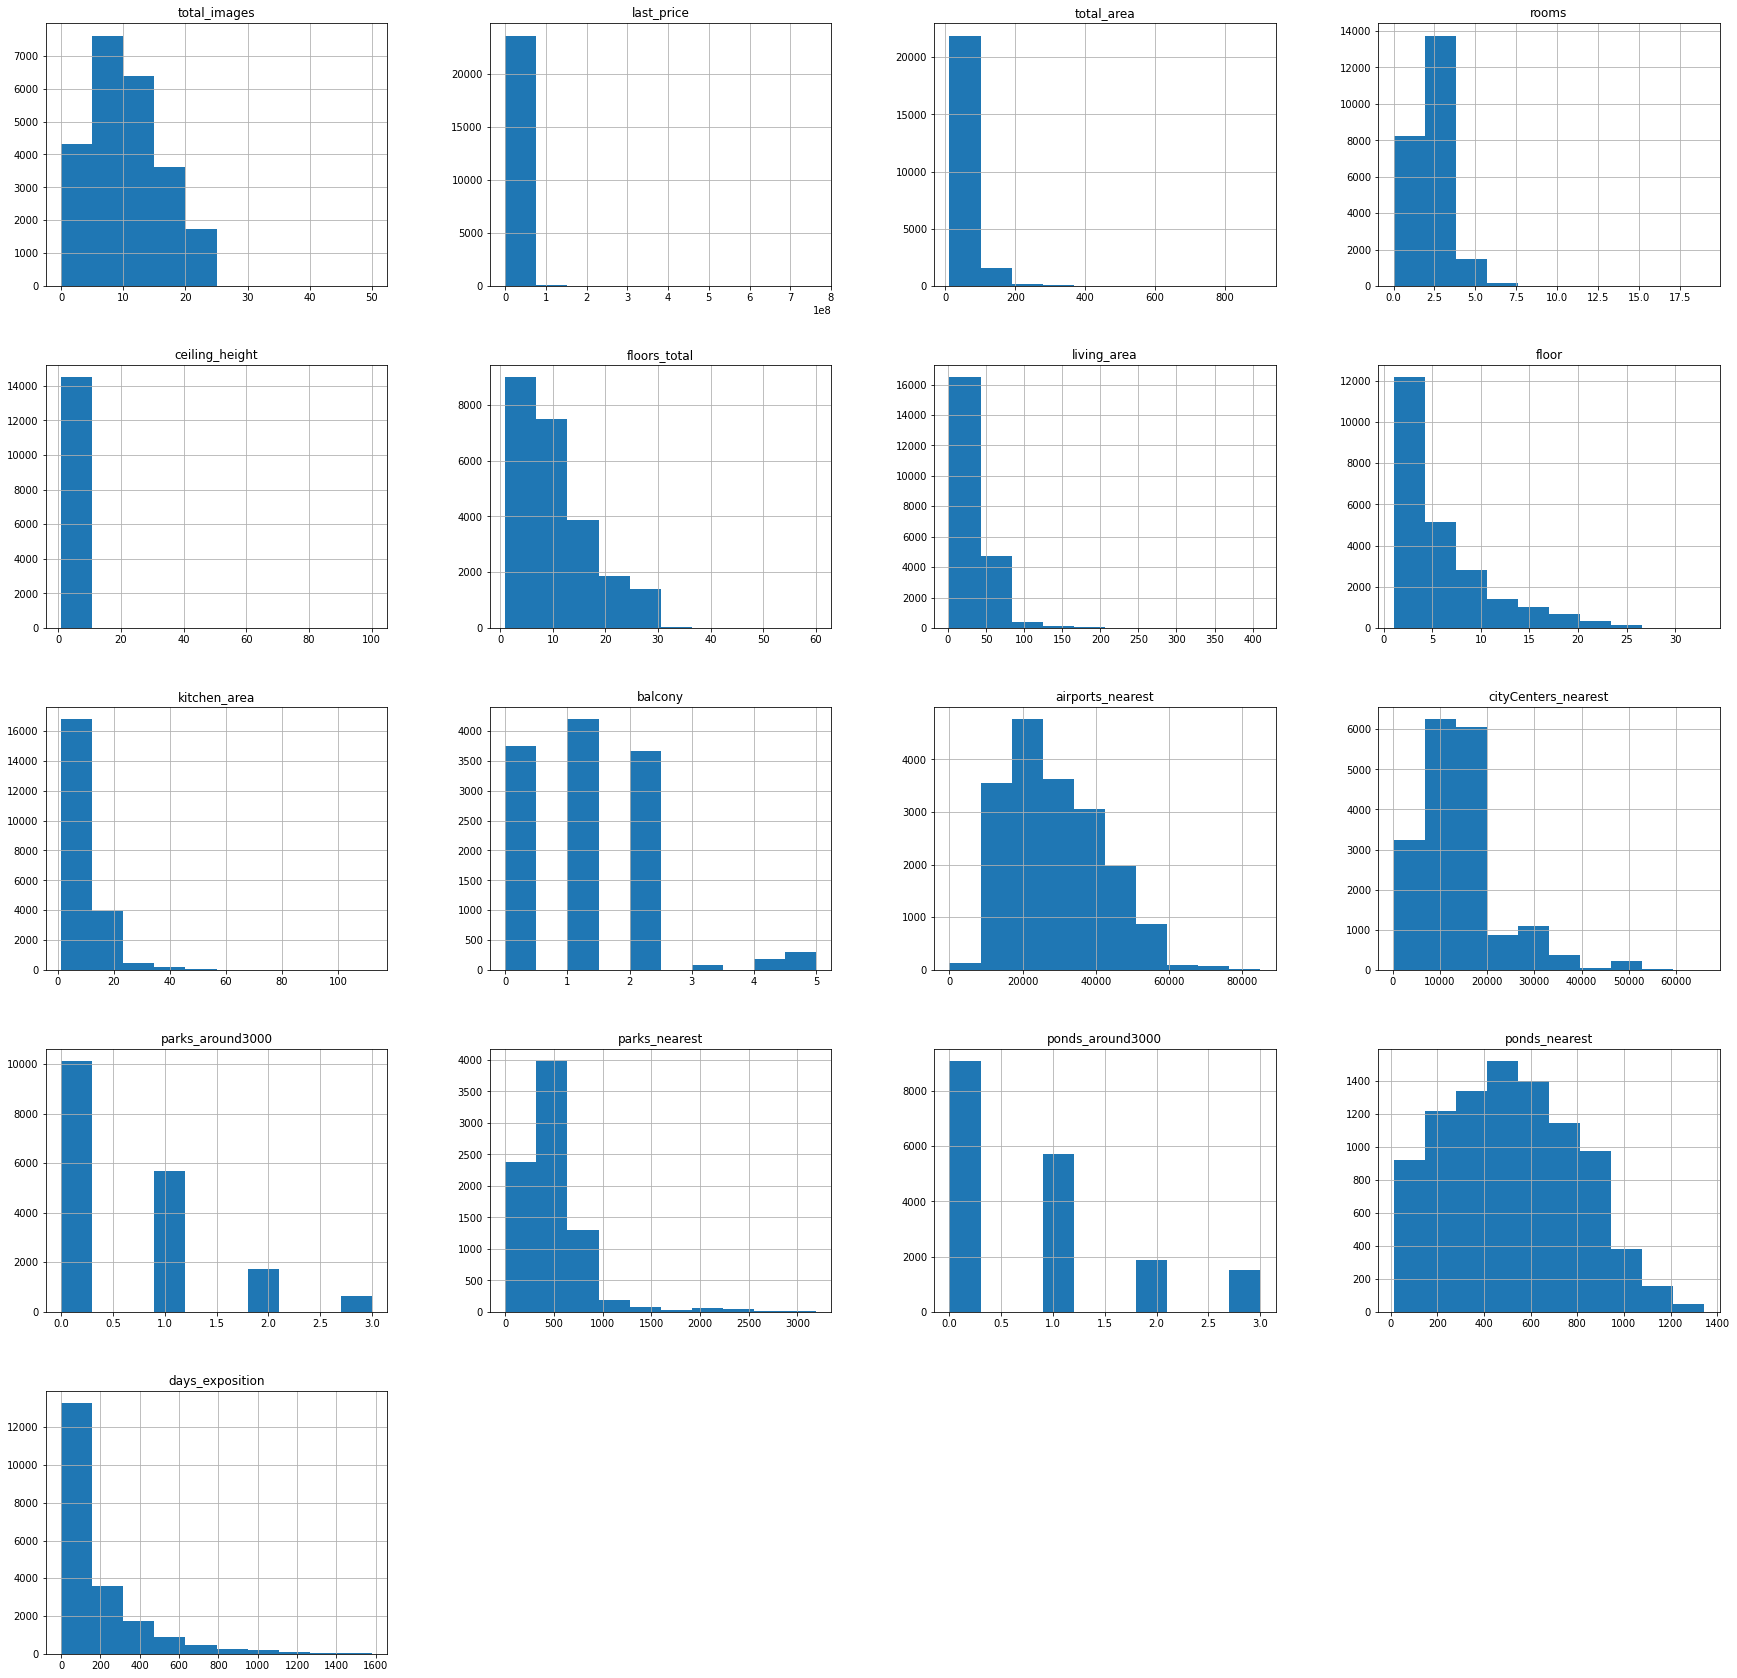

In [6]:
data.hist(figsize=(30, 30))
plt.show()

<div class="alert alert-block alert-warning">
 
### Комментарий ревьюера
    
#### Совет
    
Чтобы убрать текстовые предупрежденяи использй plt.show()

In [7]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

**Форма некоторых гистограмм, там где максимум смещен к нулю, говорит о том, сто распределение данных в них подчиняются распределению "Пуассона". А в данных где, максимум гистограммы стремится быть симметричным можно говорить о "нормальном расределении" данных.**

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
С данными ознакомились. Супер. 

### Предобработка данных

В соотвествии с правилами именования принятыми в pandas и для удобства воприятия переименуем колонки таблицы

In [8]:

data = data.rename(columns={'total_images': 'total_images_quantity', 'last_price': 'last_price_rub', 
                             'total_area': 'total_area_m2', 'first_day_exposition': 'data_start_exposition', 
                             'rooms': 'rooms_quantity', 'ceiling_height': 'ceiling_height_m', 
                             'floors_total': 'floors_total_quantity', 'living_area': 'living_area_m2', 'floor': 'floor_number', 
                             'is_apartment': 'is_apartment', 'studio': 'is_studio', 'open_plan': 'is_open_plan', 
                             'kitchen_area': 'kitchen_area_m2', 'balcony': 'balcony_quantity', 'locality_name': 'locality_name',
                             'airports_nearest': 'airports_nearest_m', 'cityCenters_nearest': 'city_centers_nearest_m', 
                             'parks_around3000': 'parks_in_3km_quantity', 'parks_nearest': 'parks_nearest_m', 
                             'ponds_around3000': 'ponds_in_3km_quantity', 'ponds_nearest': 'ponds_nearest_m', 
                             'days_exposition': 'days_exposition_quantity'})

<div class="alert alert-block alert-warning">
 
### Комментарий ревьюера
    
#### Совет
    
Чтобы быстр опривести к нижнему регистру используй df.columns = df.columns.str.lower()

In [9]:
data.columns

Index(['total_images_quantity', 'last_price_rub', 'total_area_m2',
       'data_start_exposition', 'rooms_quantity', 'ceiling_height_m',
       'floors_total_quantity', 'living_area_m2', 'floor_number',
       'is_apartment', 'is_studio', 'is_open_plan', 'kitchen_area_m2',
       'balcony_quantity', 'locality_name', 'airports_nearest_m',
       'city_centers_nearest_m', 'parks_in_3km_quantity', 'parks_nearest_m',
       'ponds_in_3km_quantity', 'ponds_nearest_m', 'days_exposition_quantity'],
      dtype='object')

#### Найдем и изучим пропущенные значения в столбцах:

In [10]:
data.isna().sum()

total_images_quantity           0
last_price_rub                  0
total_area_m2                   0
data_start_exposition           0
rooms_quantity                  0
ceiling_height_m             9195
floors_total_quantity          86
living_area_m2               1903
floor_number                    0
is_apartment                20924
is_studio                       0
is_open_plan                    0
kitchen_area_m2              2278
balcony_quantity            11519
locality_name                  49
airports_nearest_m           5542
city_centers_nearest_m       5519
parks_in_3km_quantity        5518
parks_nearest_m             15620
ponds_in_3km_quantity        5518
ponds_nearest_m             14589
days_exposition_quantity     3181
dtype: int64

Определим соотношение пропущенных занчений к общему количеству записей в каждом столбце датафрейма:

In [11]:
data.isnull().sum().sort_values() / len(data) * 100

total_images_quantity        0.000000
is_open_plan                 0.000000
floor_number                 0.000000
rooms_quantity               0.000000
is_studio                    0.000000
total_area_m2                0.000000
last_price_rub               0.000000
data_start_exposition        0.000000
locality_name                0.206760
floors_total_quantity        0.362885
living_area_m2               8.029875
kitchen_area_m2              9.612220
days_exposition_quantity    13.422507
ponds_in_3km_quantity       23.283683
parks_in_3km_quantity       23.283683
city_centers_nearest_m      23.287902
airports_nearest_m          23.384953
ceiling_height_m            38.799105
balcony_quantity            48.605426
ponds_nearest_m             61.559559
parks_nearest_m             65.909954
is_apartment                88.290645
dtype: float64

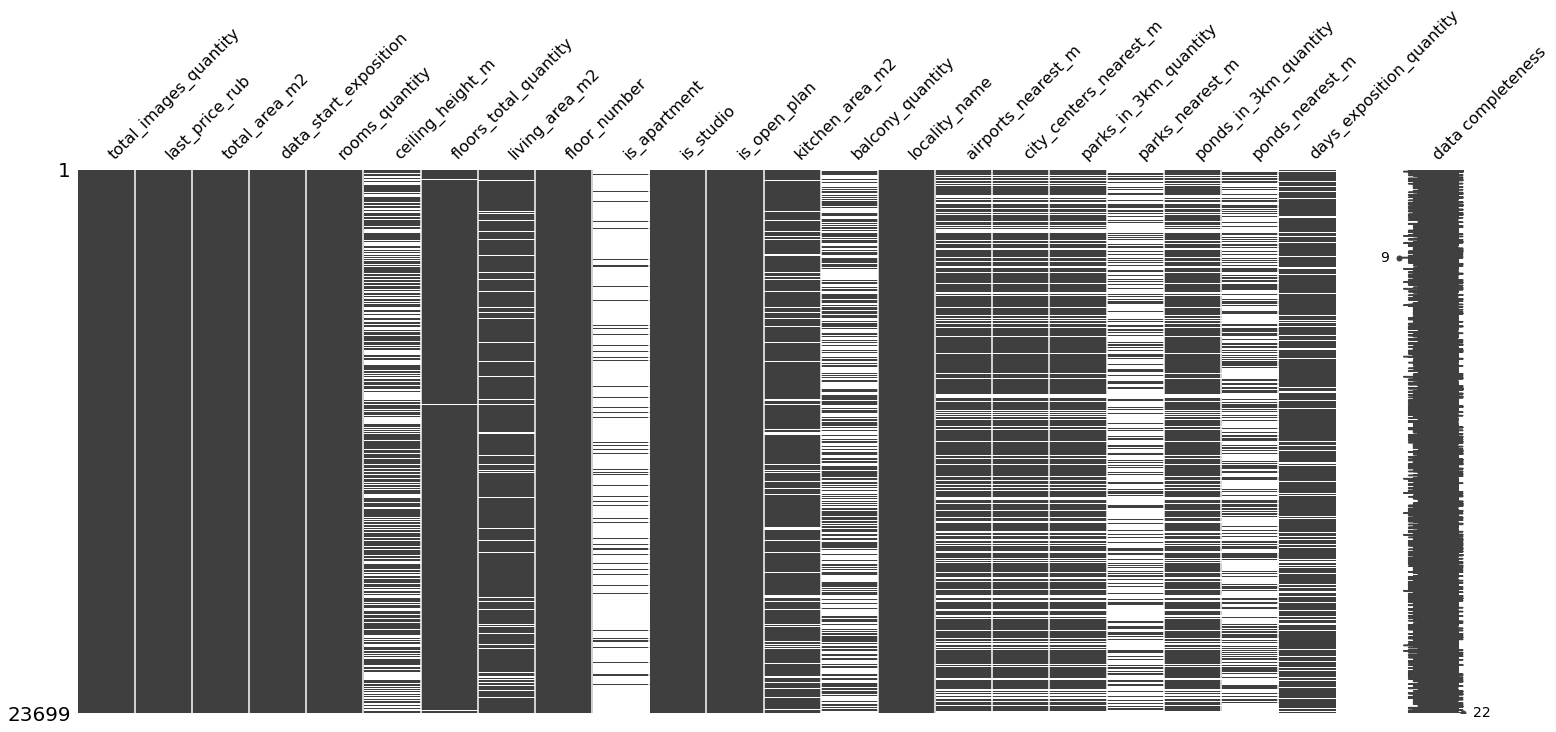

In [12]:
msno.matrix(data, labels=True)
plt.show()

<div class="alert alert-block alert-warning">
 
### Комментарий ревьюера
    
#### Совет
    
Для визуализации пропусков используй https://russianblogs.com/article/5001266235/

<div class="alert alert-block alert-success">
 
# Комментарий ревьюера ver.2 
    
#### Успех
    
Здорово, что ты решил сразу воспользоваться

Изменим располложения колонок в соответсвии со степенью важности каждой колонки для удобства восприятия всей таблица в целом:

In [13]:
data = data[['locality_name', 'total_area_m2', 'living_area_m2', 'kitchen_area_m2', 'last_price_rub', \
             'is_apartment', 'is_studio', 'is_open_plan', 'rooms_quantity', 'ceiling_height_m', 'balcony_quantity', \
             'floor_number', 'floors_total_quantity', \
             'city_centers_nearest_m', 'parks_nearest_m', 'ponds_nearest_m', 'airports_nearest_m', \
             'parks_in_3km_quantity', 'ponds_in_3km_quantity', \
             'total_images_quantity', 'data_start_exposition', 'days_exposition_quantity']]

In [14]:
data.isna().sum()

locality_name                  49
total_area_m2                   0
living_area_m2               1903
kitchen_area_m2              2278
last_price_rub                  0
is_apartment                20924
is_studio                       0
is_open_plan                    0
rooms_quantity                  0
ceiling_height_m             9195
balcony_quantity            11519
floor_number                    0
floors_total_quantity          86
city_centers_nearest_m       5519
parks_nearest_m             15620
ponds_nearest_m             14589
airports_nearest_m           5542
parks_in_3km_quantity        5518
ponds_in_3km_quantity        5518
total_images_quantity           0
data_start_exposition           0
days_exposition_quantity     3181
dtype: int64

In [15]:
data.head(20)

,locality_name,total_area_m2,living_area_m2,kitchen_area_m2,last_price_rub,is_apartment,is_studio,is_open_plan,rooms_quantity,ceiling_height_m,...,floors_total_quantity,city_centers_nearest_m,parks_nearest_m,ponds_nearest_m,airports_nearest_m,parks_in_3km_quantity,ponds_in_3km_quantity,total_images_quantity,data_start_exposition,days_exposition_quantity
0,Санкт-Петербург,108.00,51.00,25.00,13000000.0,NaN,False,False,3,2.70,...,16.0,16028.0,482.0,755.0,18863.0,1.0,2.0,20,2019-03-07T00:00:00,NaN
1,посёлок Шушары,40.40,18.60,11.00,3350000.0,NaN,False,False,1,NaN,...,11.0,18603.0,NaN,NaN,12817.0,0.0,0.0,7,2018-12-04T00:00:00,81.0
2,Санкт-Петербург,56.00,34.30,8.30,5196000.0,NaN,False,False,2,NaN,...,5.0,13933.0,90.0,574.0,21741.0,1.0,2.0,10,2015-08-20T00:00:00,558.0
3,Санкт-Петербург,159.00,NaN,NaN,64900000.0,NaN,False,False,3,NaN,...,14.0,6800.0,84.0,234.0,28098.0,2.0,3.0,0,2015-07-24T00:00:00,424.0
4,Санкт-Петербург,100.00,32.00,41.00,10000000.0,NaN,False,False,2,3.03,...,14.0,8098.0,112.0,48.0,31856.0,2.0,1.0,2,2018-06-19T00:00:00,121.0
5,городской посёлок Янино-1,30.40,14.40,9.10,2890000.0,NaN,False,False,1,NaN,...,12.0,NaN,NaN,NaN,NaN,NaN,NaN,10,2018-09-10T00:00:00,55.0
6,посёлок Парголово,37.30,10.60,14.40,3700000.0,NaN,False,False,1,NaN,...,26.0,19143.0,NaN,NaN,52996.0,0.0,0.0,6,2017-11-02T00:00:00,155.0
7,Санкт-Петербург,71.60,NaN,18.90,7915000.0,NaN,False,False,2,NaN,...,24.0,11634.0,NaN,NaN,23982.0,0.0,0.0,5,2019-04-18T00:00:00,NaN
8,посёлок Мурино,33.16,15.43,8.81,2900000.0,NaN,False,False,1,NaN,...,27.0,NaN,NaN,NaN,NaN,NaN,NaN,20,2018-05-23T00:00:00,189.0
9,Санкт-Петербург,61.00,43.60,6.50,5400000.0,NaN,False,False,3,2.50,...,9.0,15008.0,NaN,NaN,50898.0,0.0,0.0,18,2017-02-26T00:00:00,289.0


В некоторых колонках очень много пропусков, количество колонок с пропускми 14 из 22, почти две трети от общего количества.

In [16]:
#days_exposition_quantity_median = data['days_exposition_quantity'].median()
#days_exposition_quantity_median

<div class="alert alert-block alert-danger">
 
### Комментарий ревьюера
    
#### Ошибка
    
Тут не соглашусь. Все же каждое объявление индивидуально, и равнять все под медианный срок не совсем верное решение.

In [17]:
#data['days_exposition_quantity'] = data['days_exposition_quantity'].fillna(value=days_exposition_quantity_median)

In [18]:
#data['days_exposition_quantity'].isna().sum()

In [19]:
#len(data['days_exposition_quantity'].value_counts(ascending=False))

<div class="alert alert-info"> <b>Комментарий студента:</b> Если равнять все под медианный срок не совсем верное решение, то для того, что устраник пропуски в колонке: "сколько дней было размещено объявление (от публикации до снятия)", можно предложить 4-е варианта их устранения:

    1. Ничем не заполнять, оставить все без изменений, 

    2. Заполнить "заглушкой" в виде цифры: "0", 

    3. Предположив, что если их разместили и сразу сняли заполнить цифрой: "1", 

    4. Если предположить, что с момента размещения объявления еще актуальны, то ОПРЕДЕЛИВ ДАТУ КОГДА БЫЛ ВЫГРУЖЕН ВЕСЬ ДАТАФРЕЙМ можно НАЙТИ ПРОПУЩЕННЫЕ ЗНАЧЕНИЯ В ДАННОЙ КОЛОНКЕ: вычесть из "ДАТЫ КОГДА БЫЛ ВЫГРУЖЕН ВЕСЬ ДАТАФРЕЙМ" значения в колоке с "датой публикации объявлений", которая нам известна.</div>.

**После того как реализовать 4-й вариант не удалось, решил остановиться на 1-м варианте и оставить все без изменений.**

<div class="alert alert-block alert-success">
 
# Комментарий ревьюера ver.2 
    
#### Успех
    
Очень подробно и основательно. Молодец. С вариантом согласен.

Пропущенные значения в столбце: **balcony_quantity** - число балконов, скорее всего говорит об отсутствии в этих объектах недвижимост балконов, поэтому заменим их цифрой 0.

In [20]:
data['balcony_quantity'] = data['balcony_quantity'].fillna(value=0)

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Согласен, раз были пропуски, то самих балконов могло и не быть

In [21]:
data['balcony_quantity'].isna().sum()

0

In [22]:
data['balcony_quantity'].value_counts(ascending=False)

0.0    15277
1.0     4195
2.0     3659
5.0      304
4.0      183
3.0       81
Name: balcony_quantity, dtype: int64

Пропущенных значений в колонке: **is_apartment** очень много. Понятно, что здесь может скрываться очень большая неопределенность связанная с умышленным не предоставлением информации по данной колонке. Очевидно, что в характеристиках недвижимости присутсвует взаимосвязь их между собой. Поэтому будем считать, что если в характеристиках объекта недвижимости не указана жилая площадь (её просто нет) и он не относится к студии или к квартире свободной планировке, то его следует отнести к аппартаментам.

In [23]:
data['is_apartment'].value_counts(ascending=False).head()

False    2725
True       50
Name: is_apartment, dtype: int64

In [24]:
for t in data['total_area_m2'].unique():
    data.loc[(data['is_apartment'].isna()) & (data['living_area_m2'].isna()) \
             & ((data['is_studio'] == False) | (data['is_open_plan'] == False)), 'is_apartment'] = True

In [25]:
data['is_apartment'].value_counts(ascending=False).head()

False    2725
True     1833
Name: is_apartment, dtype: int64

Оставшиеся пропущенные значения в колонке: **is_apartment** скорее всего говорято том, что изначально продавцы либо не знают, либо не считают их аппартаментами. Поэтому заполним их значением "False".

In [26]:
data['is_apartment'] = data['is_apartment'].fillna(value=False)

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Здорово. Поддерживаю.

In [27]:
data['is_apartment'].isna().sum()

0

Пропущенных значений в колонке: **living_area_m2** и **kitchen_area_m2** скорее всего говорят о том, что в характеристиках данных объектов недвижимости нет жилой площади и площади кухни, поэтому заполним пропуски в них цифрой ноль.

In [28]:
data['living_area_m2'] = data['living_area_m2'].fillna(value=0)

In [29]:
data['living_area_m2'].isna().sum()

0

In [30]:
data['kitchen_area_m2'] = data['kitchen_area_m2'].fillna(value=0)

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Значения-заглушки это хорошее решение в данном случае

In [31]:
data['kitchen_area_m2'].isna().sum()

0

Пропущенных значений в колонке: **floors_total_quantity** - всего этажей в доме, очень мало, скорее всего их отсутствие говорит о какой-либо технической ошибке, поэтому заменим их медианным занчением по данной колонке.

In [32]:
floors_total_median = data['floors_total_quantity'].median()
floors_total_median

9.0

In [33]:
data['floors_total_quantity'] = data['floors_total_quantity'].fillna(value=floors_total_median)

In [34]:
data['floors_total_quantity'].isna().sum()

0

In [35]:
data['floors_total_quantity'].unique()

array([16., 11.,  5., 14., 12., 26., 24., 27.,  9.,  6., 17., 25.,  3.,
       23., 19., 18.,  4., 22.,  8.,  2., 10.,  7., 13., 15., 20., 28.,
       36., 21., 35., 34., 60.,  1., 29., 33., 52., 37.])

**Причины появления пропусков в др. колонках определенно объяснить пока достаточно сложно, поэтому обработку пропусков в этох колонках произведем позже.**

**Определим колонки в которых, необходимо поменять типы данных:**

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   locality_name             23650 non-null  object 
 1   total_area_m2             23699 non-null  float64
 2   living_area_m2            23699 non-null  float64
 3   kitchen_area_m2           23699 non-null  float64
 4   last_price_rub            23699 non-null  float64
 5   is_apartment              23699 non-null  bool   
 6   is_studio                 23699 non-null  bool   
 7   is_open_plan              23699 non-null  bool   
 8   rooms_quantity            23699 non-null  int64  
 9   ceiling_height_m          14504 non-null  float64
 10  balcony_quantity          23699 non-null  float64
 11  floor_number              23699 non-null  int64  
 12  floors_total_quantity     23699 non-null  float64
 13  city_centers_nearest_m    18180 non-null  float64
 14  parks_

**data_start_exposition - тип object, изменим на datetime64**;

**balcony_quantity - тип float64, изменим на int32**;

**is_apartment - тип object, изменим на bool**;

**days_exposition_quantity - тип float64, изменим на int32**;

**floors_total_quantity - тип float64, изменим на int32**;

In [37]:
data['data_start_exposition'] = pd.to_datetime(data['data_start_exposition'])

In [38]:
data['balcony_quantity'] = data['balcony_quantity'].astype('int32')

In [39]:
data['is_apartment'] = data['is_apartment'].astype('bool')

In [40]:
#data['days_exposition_quantity'] = data['days_exposition_quantity'].astype('int32')

In [41]:
data['floors_total_quantity'] = data['floors_total_quantity'].astype('int32')

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Здорово, что заменяешь на int32. О экономии вычислительной памяти надо помнить. 

Следующие типы данных: 

**parks_in_3km_quantity - тип float64;**

**ponds_in_3km_quantity - тип float64;**

которые надо изменить. обработам позже.

Обработаем уникальные значения в колонке с названиями **locality_name** и устраним неявные дубликаты в названиях:

In [42]:
len(data['locality_name'].unique())

365

In [43]:
 data['locality_name'].unique().tolist()

['Санкт-Петербург',
 'посёлок Шушары',
 'городской посёлок Янино-1',
 'посёлок Парголово',
 'посёлок Мурино',
 'Ломоносов',
 'Сертолово',
 'Петергоф',
 'Пушкин',
 'деревня Кудрово',
 'Коммунар',
 'Колпино',
 'поселок городского типа Красный Бор',
 'Гатчина',
 'поселок Мурино',
 'деревня Фёдоровское',
 'Выборг',
 'Кронштадт',
 'Кировск',
 'деревня Новое Девяткино',
 'посёлок Металлострой',
 'посёлок городского типа Лебяжье',
 'посёлок городского типа Сиверский',
 'поселок Молодцово',
 'поселок городского типа Кузьмоловский',
 'садовое товарищество Новая Ропша',
 'Павловск',
 'деревня Пикколово',
 'Всеволожск',
 'Волхов',
 'Кингисепп',
 'Приозерск',
 'Сестрорецк',
 'деревня Куттузи',
 'посёлок Аннино',
 'поселок городского типа Ефимовский',
 'посёлок Плодовое',
 'деревня Заклинье',
 'поселок Торковичи',
 'поселок Первомайское',
 'Красное Село',
 'посёлок Понтонный',
 'Сясьстрой',
 'деревня Старая',
 'деревня Лесколово',
 'посёлок Новый Свет',
 'Сланцы',
 'село Путилово',
 'Ивангород',
 '

In [44]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е', regex=True)

In [45]:
len(data['locality_name'].unique())

331

In [46]:
data['locality_name'] = data['locality_name'].str.replace('городской поселок', 'поселок', regex=True)

In [47]:
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа', 'поселок', regex=True)

In [48]:
data['locality_name'] = data['locality_name'].str.replace('село ', 'деревня ', regex=True)

In [49]:
len(data['locality_name'].unique())

323

<div class="alert alert-block alert-warning">
 
### Комментарий ревьюера
    
#### Совет
    
Здесь можно было еще вывести сколько все же у нас осталось названий.

Т.к. однозначно установить к каким населенным пуктам относятся объекты недвижимости с пропусками в колонке **locality_name** не представляется возможным, то удалим строки с данными по этим объектам недвижимости из таблицы.

In [50]:
data = data.dropna(subset=['locality_name'])

In [51]:
data['locality_name'].isna().sum()

0

Обработаем редкие и выбивающиеся значения в колонке с названиями **ceiling_height_m** и устраним их:

Скорее всего ошибочные значения типа 1,0 метра или 25.0 метра можно трактовать как ошибку возникшую при вводе данных, когда запятая отделяющая целую часть числа от его дробной части, ставится не в том месте. Поэтому исправм их изменив разряд числа на одну десятую часть в сторну увеличения и уменьшения:

In [52]:
data['ceiling_height_m'] = np.where((data['ceiling_height_m'] > 24), data['ceiling_height_m']/10, data['ceiling_height_m'])
data['ceiling_height_m'] = np.where((data['ceiling_height_m'] < 2.4), data['ceiling_height_m']*10, data['ceiling_height_m'])

In [53]:
len(data['ceiling_height_m'].unique())

177

In [54]:
ceiling_height_median = data['ceiling_height_m'].median()
ceiling_height_median

2.65

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Высота потолков достаточно стандартизированный параметр. Можно заменить медианой

Заполним пропущенные значения медианным значением:

In [55]:
data['ceiling_height_m'] = data['ceiling_height_m'].fillna(value=ceiling_height_median)

In [56]:
data['ceiling_height_m'].isna().sum()

0

#### Посмотрим есть ли зависимость между место положением объектов недвижимости и расстоянием от них до центра города и аэропорта.

In [57]:
data_pivot_1 = data.pivot_table(index=['locality_name'], values=['city_centers_nearest_m', 'airports_nearest_m'], aggfunc=['count', 'mean'])
data_pivot_1.head(50)

count                         \
                           airports_nearest_m city_centers_nearest_m   
locality_name                                                          
Бокситогорск                                0                      0   
Волосово                                    0                      0   
Волхов                                      0                      0   
Всеволожск                                  0                      0   
Выборг                                      0                      0   
Высоцк                                      0                      0   
Гатчина                                     0                      0   
Зеленогорск                                24                     24   
Ивангород                                   0                      0   
Каменногорск                                0                      0   
Кингисепп                                   0                      0   
Кириши                                      0                      0   
Кировск                                     0                      0   
Колпино                                   337                    337   
Коммунар                                    0                      0   
Красное Село                              176                    176   
Кронштадт                                  95                     95   
Кудрово                                     0                      0   
Лодейное Поле                               0                      0   
Ломоносов                                 132                    132   
Луга                                        0                      0   
Любань                                      0                      0   
Мурино                                      0                      0   
Никольское                                  0                      0   
Новая Ладога                                0                      0   
Отрадное                                    0                      0   
Павловск                                   38                     38   
Петергоф                                  201                    201   
Пикалево                                    0                      0   
Подпорожье                                  0                      0   
Приморск                                    0                      0   
Приозерск                                   0                      0   
Пушкин                                    369                    368   
Санкт-Петербург                         15636                  15660   
Светогорск                                  0                      0   
Сертолово                                   0                      0   
Сестрорецк                                183                    183   
Сланцы                                      0                      0   
Сосновый Бор                                0                      0   
Сясьстрой                                   0                      0   
Тихвин                                      0                      0   
Тосно                                       0                      0   
Шлиссельбург                                0                      0   
деревня Агалатово                           0                      0   
деревня Аро                                 0                      0   
деревня Батово                              0                      0   
деревня Бегуницы                            0                      0   
деревня Белогорка                           0                      0   
деревня Большая Вруда                       0                      0   
деревня Большая Пустомержа                  0                      0   

                                         mean                         
                           airports_nearest_m city_centers_nearest_m  
locality_name                                                         
Бокситогор

In [58]:
for t in data['locality_name'].unique():
    data.loc[(data['locality_name'] == t) & (data['airports_nearest_m'].isna()), 'airports_nearest_m'] = \
    data.loc[(data['locality_name'] == t), 'airports_nearest_m'].mean()

In [59]:
for t in data['locality_name'].unique():
    data.loc[(data['locality_name'] == t) & (data['city_centers_nearest_m'].isna()), 'city_centers_nearest_m'] = \
    data.loc[(data['locality_name'] == t), 'city_centers_nearest_m'].mean()

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Достаточно точечный метод вышел. 

Продавцы объектов недвижимости находящихся за пределами административных границ города Санкт-Петербурга не знают какое растояние от объектов недвижимости до центра Санкт-Петербурга и до аэропорта "Пулково" (или эта ниформация в данном случае не имеет значения), поэтому заполним отсутствущие данные в колонках **airports_nearest_m** и **city_centers_nearest_m** нулями.

In [60]:
data['airports_nearest_m'] = data['airports_nearest_m'].fillna(value=0)

In [61]:
data['airports_nearest_m'].isna().sum()

0

In [62]:
data['city_centers_nearest_m'] = data['city_centers_nearest_m'].fillna(value=0)

In [63]:
data['city_centers_nearest_m'].isna().sum()

0

**Посмотрим есть ли зависимость между место положением объектов недвижимости и расстоянием от них до ближайшего парка и озера.**

In [64]:
data_pivot_2 = data.pivot_table(index=['locality_name'], values=['parks_nearest_m', 'ponds_nearest_m'], \
                                aggfunc=['count', 'mean'])
data_pivot_2.head(50)

count                            mean  \
                           parks_nearest_m ponds_nearest_m parks_nearest_m   
locality_name                                                                
Бокситогорск                             0               0             NaN   
Волосово                                 0               0             NaN   
Волхов                                   0               0             NaN   
Всеволожск                               0               0             NaN   
Выборг                                   0               0             NaN   
Высоцк                                   0               0             NaN   
Гатчина                                  0               0             NaN   
Зеленогорск                             16              18      210.625000   
Ивангород                                0               0             NaN   
Каменногорск                             0               0             NaN   
Кингисепп                                0               0             NaN   
Кириши                                   0               0             NaN   
Кировск                                  0               0             NaN   
Колпино                                133             190      495.481203   
Коммунар                                 0               0             NaN   
Красное Село                            46              10      466.086957   
Кронштадт                               87              87      324.574713   
Кудрово                                  0               0             NaN   
Лодейное Поле                            0               0             NaN   
Ломоносов                               16              83      389.062500   
Луга                                     0               0             NaN   
Любань                                   0               0             NaN   
Мурино                                   0               0             NaN   
Никольское                               0               0             NaN   
Новая Ладога                             0               0             NaN   
Отрадное                                 0               0             NaN   
Павловск                                26              34      379.538462   
Петергоф                               143             117      419.559441   
Пикалево                                 0               0             NaN   
Подпорожье                               0               0             NaN   
Приморск                                 0               0             NaN   
Приозерск                                0               0             NaN   
Пушкин                                 212             177      404.297170   
Санкт-Петербург                       7284            7983      498.597886   
Светогорск                               0               0             NaN   
Сертолово                                0               0             NaN   
Сестрорецк                              72             135      409.583333   
Сланцы                                   0               0             NaN   
Сосновый Бор                             0               0             NaN   
Сясьстрой                                0               0             NaN   
Тихвин                                   0               0             NaN   
Тосно                                    0               0             NaN   
Шлиссельбург                             0               0             NaN   
деревня Агалатово                        0               0             NaN   
деревня Аро                              0               0             NaN   
деревня Батово                           0               0             NaN   
деревня Бегуницы                         0               0             NaN   
деревня Белогорка                        0               0             NaN   
деревня Большая Вруда                    0               0 

Результаты данной сводной таблицы похожи на предыдущую продавцы объектов недвижимости находящихся за пределами административных границ города Санкт-Петербурга не знают какое растояние от объектов их недвижимости до ближайших озера и парка, поэтому заполним отсутствущие данные в колонках **parks_in_3km_quantity** и **ponds_in_3km_quantity** нулями.

In [65]:
data['parks_nearest_m'] = data['parks_nearest_m'].fillna(value=0)

In [66]:
data['parks_nearest_m'].isna().sum()

0

In [67]:
data['ponds_nearest_m'] = data['ponds_nearest_m'].fillna(value=0)

In [68]:
data['ponds_nearest_m'].isna().sum()

0

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
В этом случае заглушки тоже подойдут.

**Посмотрим есть ли зависимость между место положением объектов недвижимости и количеством расположенных рядом с ними парков и озер.**

In [69]:
data_pivot_2 = data.pivot_table(index=['locality_name'], values=['parks_in_3km_quantity', 'ponds_in_3km_quantity'], \
                                aggfunc=['count', 'mean'])
data_pivot_2.head(50)

count                        \
                           parks_in_3km_quantity ponds_in_3km_quantity   
locality_name                                                            
Бокситогорск                                   0                     0   
Волосово                                       0                     0   
Волхов                                         0                     0   
Всеволожск                                     0                     0   
Выборг                                         0                     0   
Высоцк                                         0                     0   
Гатчина                                        0                     0   
Зеленогорск                                   24                    24   
Ивангород                                      0                     0   
Каменногорск                                   0                     0   
Кингисепп                                      0                     0   
Кириши                                         0                     0   
Кировск                                        0                     0   
Колпино                                      337                   337   
Коммунар                                       0                     0   
Красное Село                                 176                   176   
Кронштадт                                     95                    95   
Кудрово                                        0                     0   
Лодейное Поле                                  0                     0   
Ломоносов                                    132                   132   
Луга                                           0                     0   
Любань                                         0                     0   
Мурино                                         0                     0   
Никольское                                     0                     0   
Новая Ладога                                   0                     0   
Отрадное                                       0                     0   
Павловск                                      38                    38   
Петергоф                                     201                   201   
Пикалево                                       0                     0   
Подпорожье                                     0                     0   
Приморск                                       0                     0   
Приозерск                                      0                     0   
Пушкин                                       369                   369   
Санкт-Петербург                            15660                 15660   
Светогорск                                     0                     0   
Сертолово                                      0                     0   
Сестрорецк                                   183                   183   
Сланцы                                         0                     0   
Сосновый Бор                                   0                     0   
Сясьстрой                                      0                     0   
Тихвин                                         0                     0   
Тосно                                          0                     0   
Шлиссельбург                                   0                     0   
деревня Агалатово                              0                     0   
деревня Аро                                    0                     0   
деревня Батово                                 0                     0   
деревня Бегуницы                               0                     0   
деревня Белогорка                              0                     0   
деревня Большая Вруда                          0                     0   
деревня Большая Пустомержа                     0                     0   

                                            mean                        
                           parks_in_3km_quantit

По результатам данной сводной таблицы, снова можно сделать вывод, что за пределами административных границ города Санкт-Петербурга не знают какое количество озер и парков расположено в 3-х км. от их объектов недвижимости, поэтому заполним отсутствущие данные в колонках parks_in_3km_quantity и ponds_in_3km_quantity нулями.

In [70]:
data['parks_in_3km_quantity'] = data['parks_in_3km_quantity'].fillna(value=0)

In [71]:
data['parks_in_3km_quantity'].isna().sum()

0

In [72]:
data['ponds_in_3km_quantity'] = data['ponds_in_3km_quantity'].fillna(value=0)

In [73]:
data['ponds_in_3km_quantity'].isna().sum()

0

Преобразуем оставшиеся типы данных в следующих колонках:

**parks_in_3km_quantity** - тип float64, изменим на int32;

**ponds_in_3km_quantity** - тип float64, изменим на int32;

**city_centers_nearest_m** - тип float64, изменим на int32;

**parks_nearest_m** - тип float64, изменим на int32;

**ponds_nearest_m** - тип float64, изменим на int32;

**airports_nearest_m** - тип float64, изменим на int32;

Также целесообразно поменять на **int32** следующие колонки:

**rooms_quantity** - изменим на int32;

**floor_number** - изменим на int32;

**total_images_quantity** - изменим на int32;

In [74]:
data['parks_in_3km_quantity'] = data['parks_in_3km_quantity'].astype('int32')

In [75]:
data['ponds_in_3km_quantity'] = data['ponds_in_3km_quantity'].astype('int32')

In [76]:
data['city_centers_nearest_m'] = data['city_centers_nearest_m'].astype('int32')

In [77]:
data['parks_nearest_m'] = data['parks_nearest_m'].astype('int32')

In [78]:
data['ponds_nearest_m'] = data['ponds_nearest_m'].astype('int32')

In [79]:
data['airports_nearest_m'] = data['airports_nearest_m'].astype('int32')

In [80]:
data['rooms_quantity'] = data['rooms_quantity'].astype('int32')

In [81]:
data['floor_number'] = data['floor_number'].astype('int32')

In [82]:
data['total_images_quantity'] = data['total_images_quantity'].astype('int32')

<div class="alert alert-block alert-warning">
 
### Комментарий ревьюера
    
#### Совет
    
А ты можешь тут автоматизировать замену и сделать ее при помощи цикла.

In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   locality_name             23650 non-null  object        
 1   total_area_m2             23650 non-null  float64       
 2   living_area_m2            23650 non-null  float64       
 3   kitchen_area_m2           23650 non-null  float64       
 4   last_price_rub            23650 non-null  float64       
 5   is_apartment              23650 non-null  bool          
 6   is_studio                 23650 non-null  bool          
 7   is_open_plan              23650 non-null  bool          
 8   rooms_quantity            23650 non-null  int32         
 9   ceiling_height_m          23650 non-null  float64       
 10  balcony_quantity          23650 non-null  int32         
 11  floor_number              23650 non-null  int32         
 12  floors_total_quant

In [84]:
data.duplicated().sum()

0

<div class="alert alert-block alert-danger">
 
### Комментарий ревьюера
    
#### Ошибка
    
Стоит здесь оставить небольшой промежуточный вывод по итогу Предобработки. 

<div class="alert alert-block alert-success">
 
# Комментарий ревьюера ver.2 
    
#### Успех
    
А теперь уже полноценный раздел.

### Выводы по предобработке:

**После выполнении предобработки устранены следующие проблемы в датафрейме:**

- Найдены и изучены пропущенные значения в столбцах датафрейма

- В основном пропущенные значения заполнены достоверными данными. Там, где это оказалось не возможным, данные остались без изменения.

- Там, где это необходимо, произвели преобразование типов данных для того, чтобы в дальнейшем правильно интерпретировать результаты предстоящего исследовательского анализа данных.

- В некоторых столбцах устранены неявные дубликаты, а также редкие и выбивающиеся значения. Те данные, в которых природа анномалии оказалась непонятна, небольшое количество данных пришлось удалить.

**Таким образом данные преобразованы и подготовлены к проведению исследововательского анализа данных.**

### Посчитайте и добавьте в таблицу новые столбцы

**Добавим в таблицу новые столбцы со следующими параметрами:**

цена одного квадратного метра;

день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);

месяц публикации объявления;

год публикации объявления;

тип этажа квартиры (значения — «‎первый», «последний», «другой»);

расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).



In [85]:
data['square_meter_rub'] = data['last_price_rub'] / data['total_area_m2']
data['square_meter_rub'] = data['square_meter_rub'].astype('int32')

In [86]:
data['day_week_publication'] = data['data_start_exposition'].dt.weekday

In [87]:
data['month_publication'] = data['data_start_exposition'].dt.month
def month_words(month_digit):
    try:
        if month_digit == 1:
            return 'Январь'
        elif month_digit == 2:
            return 'Февраль'
        elif month_digit == 3:
            return 'Март'
        elif month_digit == 4:
            return 'Апрель'
        elif month_digit == 5:
            return 'Май'
        elif month_digit == 6:
            return 'Июнь'
        elif month_digit == 7:
            return 'Июль'
        elif month_digit == 8:
            return 'Август'
        elif month_digit == 9:
            return 'Сентябрь'
        elif month_digit == 10:
            return 'Октябрь'
        elif month_digit == 11:
            return 'Ноябрь'
        else:
            return 'Декабрь'
    except:
        pass
data['month_publication'] = data['month_publication'].apply(month_words)

In [88]:
data['year_publication'] = data['data_start_exposition'].dt.year

In [89]:
def type_floor_1(floor_number):
    try:
        if floor_number == 1:
            return 'первый'
        else:
            return 'другой'
    except:
        pass
    try:
        if floor_number == 1:
            return 'первый'
        else:
            return 'другой'
    except:
        pass
data['type_floor'] = data['floor_number'].apply(type_floor_1)
data['type_floor'] = np.where(data['floor_number'] == data['floors_total_quantity'], 'последний', data['type_floor'])

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Отличный способ категоризации значенйи вышел

In [90]:
data['to_city_centers_km'] = (data['city_centers_nearest_m'] / 1000).astype('int32')

In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   locality_name             23650 non-null  object        
 1   total_area_m2             23650 non-null  float64       
 2   living_area_m2            23650 non-null  float64       
 3   kitchen_area_m2           23650 non-null  float64       
 4   last_price_rub            23650 non-null  float64       
 5   is_apartment              23650 non-null  bool          
 6   is_studio                 23650 non-null  bool          
 7   is_open_plan              23650 non-null  bool          
 8   rooms_quantity            23650 non-null  int32         
 9   ceiling_height_m          23650 non-null  float64       
 10  balcony_quantity          23650 non-null  int32         
 11  floor_number              23650 non-null  int32         
 12  floors_total_quant

### Проведите исследовательский анализ данных

**Посмотрим на итоговую таблицу**

In [92]:
data.head(10)

,locality_name,total_area_m2,living_area_m2,kitchen_area_m2,last_price_rub,is_apartment,is_studio,is_open_plan,rooms_quantity,ceiling_height_m,...,ponds_in_3km_quantity,total_images_quantity,data_start_exposition,days_exposition_quantity,square_meter_rub,day_week_publication,month_publication,year_publication,type_floor,to_city_centers_km
0,Санкт-Петербург,108.00,51.00,25.00,13000000.0,False,False,False,3,2.70,...,2,20,2019-03-07,NaN,120370,3,Март,2019,другой,16
1,поселок Шушары,40.40,18.60,11.00,3350000.0,False,False,False,1,2.65,...,0,7,2018-12-04,81.0,82920,1,Декабрь,2018,первый,18
2,Санкт-Петербург,56.00,34.30,8.30,5196000.0,False,False,False,2,2.65,...,2,10,2015-08-20,558.0,92785,3,Август,2015,другой,13
3,Санкт-Петербург,159.00,0.00,0.00,64900000.0,True,False,False,3,2.65,...,3,0,2015-07-24,424.0,408176,4,Июль,2015,другой,6
4,Санкт-Петербург,100.00,32.00,41.00,10000000.0,False,False,False,2,3.03,...,1,2,2018-06-19,121.0,100000,1,Июнь,2018,другой,8
5,поселок Янино-1,30.40,14.40,9.10,2890000.0,False,False,False,1,2.65,...,0,10,2018-09-10,55.0,95065,0,Сентябрь,2018,другой,0
6,поселок Парголово,37.30,10.60,14.40,3700000.0,False,False,False,1,2.65,...,0,6,2017-11-02,155.0,99195,3,Ноябрь,2017,другой,19
7,Санкт-Петербург,71.60,0.00,18.90,7915000.0,True,False,False,2,2.65,...,0,5,2019-04-18,NaN,110544,3,Апрель,2019,другой,11
8,поселок Мурино,33.16,15.43,8.81,2900000.0,False,False,False,1,2.65,...,0,20,2018-05-23,189.0,87454,2,Май,2018,другой,21
9,Санкт-Петербург,61.00,43.60,6.50,5400000.0,False,False,False,3,2.50,...,0,18,2017-02-26,289.0,88524,6,Февраль,2017,другой,15


In [93]:
data.columns

Index(['locality_name', 'total_area_m2', 'living_area_m2', 'kitchen_area_m2',
       'last_price_rub', 'is_apartment', 'is_studio', 'is_open_plan',
       'rooms_quantity', 'ceiling_height_m', 'balcony_quantity',
       'floor_number', 'floors_total_quantity', 'city_centers_nearest_m',
       'parks_nearest_m', 'ponds_nearest_m', 'airports_nearest_m',
       'parks_in_3km_quantity', 'ponds_in_3km_quantity',
       'total_images_quantity', 'data_start_exposition',
       'days_exposition_quantity', 'square_meter_rub', 'day_week_publication',
       'month_publication', 'year_publication', 'type_floor',
       'to_city_centers_km'],
      dtype='object')

Наиболее важные данные для анализа находятся в следующих колонках датафрейма: **'locality_name', 'total_area_m2', last_price_rub', 'rooms_quantity', 'ceiling_height_m', 'balcony_quantity'** поэтому произведем повторный анализ в данных колонках.

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
А вот теперь данные готовы к дальнейшему исследованию.

## ЦЕНА ОБЪЕКТА

(0.0, 20000000.0)

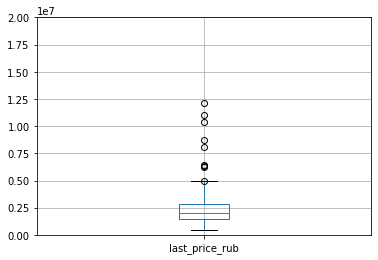

In [94]:
data.pivot_table(index='locality_name', values='last_price_rub').boxplot()
plt.ylim(0, 20000000)

In [95]:
data['last_price_rub'].describe()

count    2.365000e+04
mean     6.541127e+06
std      1.089640e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.799000e+06
max      7.630000e+08
Name: last_price_rub, dtype: float64

array([[<AxesSubplot:title={'center':'last_price_rub'}>]], dtype=object)

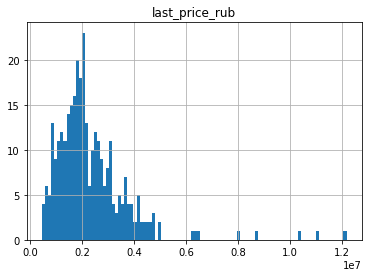

In [96]:
best_last_price_rub = data.pivot_table(index='locality_name', values='last_price_rub')
best_last_price_rub.hist(bins=100)

<AxesSubplot:>

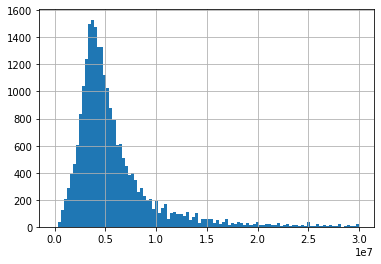

In [97]:
data['last_price_rub'].hist(range = (0, 30000000), bins=100)

#### Анализ стоимости показывает, что пользующиеся спросом объекты недвижимости распологается в промежутке цены от 1,2 до около 8,0 милионов рублей, при этом большая часть из них реализуется по цене от 3,4 до 6,8 милионов рублей, медианная ценна равна 4,7 милионам рублей, при этом средняя цена больше медианной и равна 6,5 миллионов рублей. Среднеквадратическое отклонение не превышает величины 1,09 и говорит о том, что в представленных данных нет серъезных аномалий и выбросов.

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
С ценой разобрались. Идем далее.

## ОБЩАЯ ПЛОЩАДЬ

(10.0, 200.0)

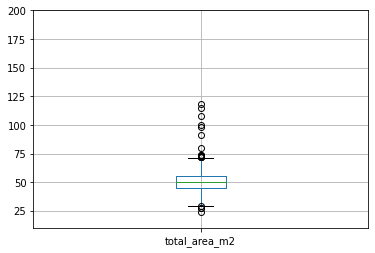

In [98]:
data.pivot_table(index='locality_name', values='total_area_m2').boxplot()
plt.ylim(10, 200)

In [99]:
data['total_area_m2'].describe()

count    23650.000000
mean        60.329069
std         35.661808
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area_m2, dtype: float64

array([[<AxesSubplot:title={'center':'total_area_m2'}>]], dtype=object)

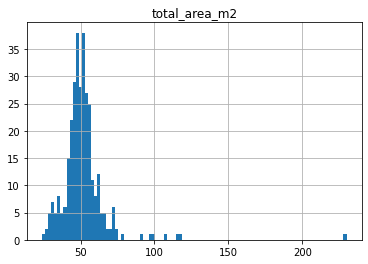

In [100]:
best_total_area_m2 = data.pivot_table(index='locality_name', values='total_area_m2')
best_total_area_m2.hist(bins=100)

<AxesSubplot:>

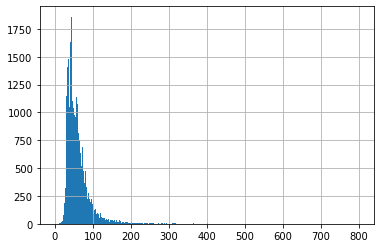

In [101]:
data['total_area_m2'].hist(range = (0, 800), bins=300)

#### Данные представленных в колонке с общей площадью характеризуются очень большим стандартным отклонением, которое состовляет 35,66 и говорит о том, что данные прежде всего неоднородны и могут иметь аномалии и выбросы.

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Большая часть квартир имеет площадь от 30 до 60 метров

## КОЛИЧЕСТВО КОМНАТ

(0.0, 8.0)

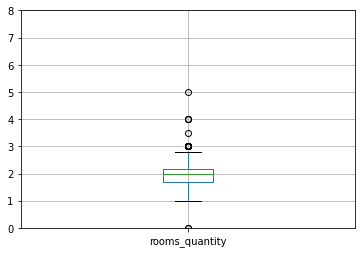

In [102]:
data.pivot_table(index='locality_name', values='rooms_quantity').boxplot()
plt.ylim(0, 8)

In [103]:
data['rooms_quantity'].describe()

count    23650.000000
mean         2.070106
std          1.078620
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms_quantity, dtype: float64

array([[<AxesSubplot:title={'center':'rooms_quantity'}>]], dtype=object)

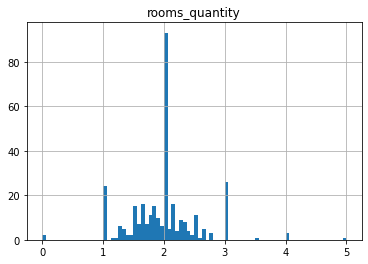

In [104]:
data.pivot_table(index='locality_name', values='rooms_quantity').hist(bins=80)

<AxesSubplot:>

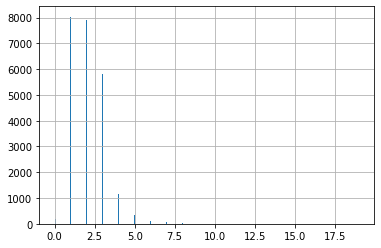

In [105]:
data['rooms_quantity'].hist(bins=300)

#### Данные с количеством комнат характеризуются малым стандартным отклоненем 1,08 при этом наиболее распространненым объектам недвижимости являются 2-х комнатные квартиры.

### ВЫСОТА ПОТОЛКОВ

(2.0, 4.0)

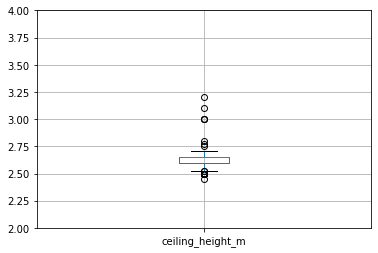

In [106]:
data.pivot_table(index='locality_name', values='ceiling_height_m', aggfunc='median').boxplot()
plt.ylim(2, 4)

In [107]:
data['ceiling_height_m'].describe()

count    23650.000000
mean         2.717115
std          0.621585
min          2.400000
25%          2.600000
50%          2.650000
75%          2.700000
max         24.000000
Name: ceiling_height_m, dtype: float64

array([[<AxesSubplot:title={'center':'ceiling_height_m'}>]], dtype=object)

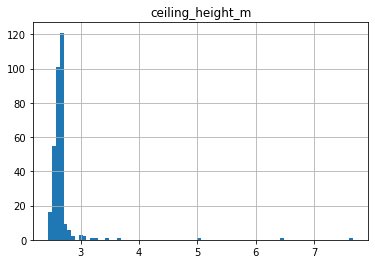

In [108]:
data.pivot_table(index='locality_name', values='ceiling_height_m').hist(bins=80)

#### Данные с высотой потолков характеризуются очень малым стандартным отклоненем 0,62 при этом наиболее распространенная высота потолков находится в промежутке от 2,6 до 2,7 метров.

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Потолки более 3 метров могут говорить о наличии квартир дореволюционного периода. 

### КОЛИЧЕСТВО БАЛКОНОВ

(-1.0, 6.0)

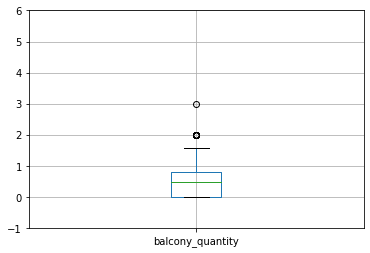

In [109]:
data.pivot_table(index='locality_name', values='balcony_quantity').boxplot()
plt.ylim(-1, 6)

In [110]:
data['balcony_quantity'].describe()

count    23650.000000
mean         0.591712
std          0.959662
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: balcony_quantity, dtype: float64

array([[<AxesSubplot:title={'center':'balcony_quantity'}>]], dtype=object)

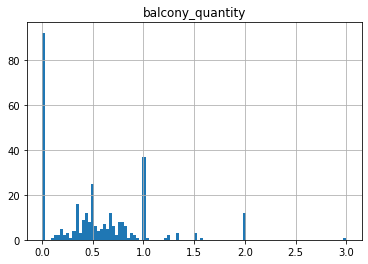

In [111]:
data.pivot_table(index='locality_name', values='balcony_quantity').hist(bins=100)

In [112]:
data['balcony_quantity'].unique()

array([0, 2, 1, 5, 4, 3], dtype=int32)

#### Данные с количеством балконов характеризуются малым стандартным отклоненем 0,96 при этом самое распространенное количество балконо это один балкон либо их отсутствие.

### ЖИЛАЯ ПЛОЩАДЬ

(0.0, 100.0)

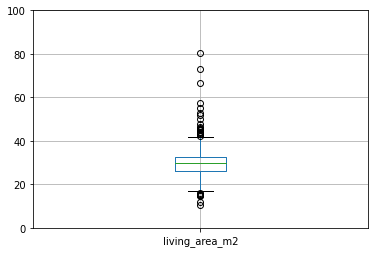

In [113]:
data.query('living_area_m2 != 0').pivot_table(index='locality_name', values='living_area_m2').boxplot()
plt.ylim(0, 100)

In [114]:
data['living_area_m2'].describe()

count    23650.000000
mean        31.683748
std         23.114453
min          0.000000
25%         17.800000
50%         29.000000
75%         41.037500
max        409.700000
Name: living_area_m2, dtype: float64

array([[<AxesSubplot:title={'center':'living_area_m2'}>]], dtype=object)

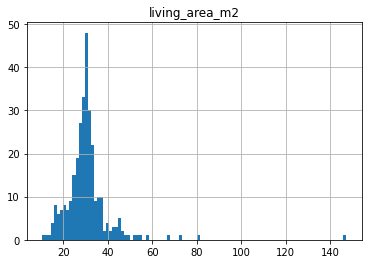

In [115]:
data.query('living_area_m2 != 0').pivot_table(index='locality_name', values='living_area_m2').hist(bins=100)

#### Данные представленных в колонке с жилой площадью характеризуются очень большим стандартным отклонением, которое состовляет 23,11 и говорит о том, что данные прежде всего неоднородны и могут иметь аномалии и выбросы.

### ПЛОЩАДЬ КУХНИ

0.38671100562027044

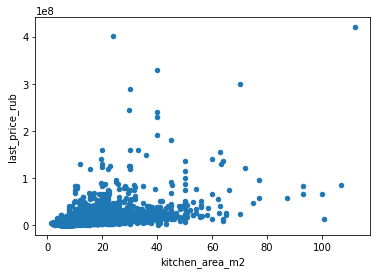

In [116]:
data.query('kitchen_area_m2 != 0').plot(kind = 'scatter', y = 'last_price_rub', x = 'kitchen_area_m2', alpha = 1)
data['last_price_rub'].corr(data['kitchen_area_m2'])

(0.0, 40.0)

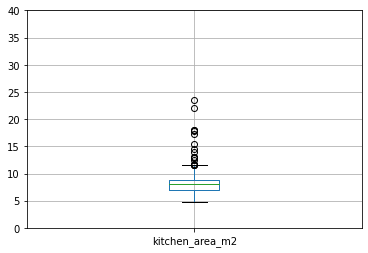

In [117]:
data.query('kitchen_area_m2 != 0').pivot_table(index='locality_name', values='kitchen_area_m2').boxplot()
plt.ylim(0, 40)

In [118]:
data['kitchen_area_m2'].describe()

count    23650.000000
mean         9.552654
std          6.416640
min          0.000000
25%          6.300000
50%          9.000000
75%         11.427500
max        112.000000
Name: kitchen_area_m2, dtype: float64

array([[<AxesSubplot:title={'center':'kitchen_area_m2'}>]], dtype=object)

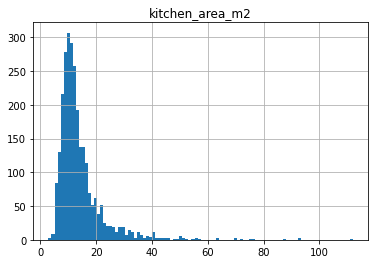

In [119]:
data.query('kitchen_area_m2 != 0').pivot_table(index='last_price_rub', values='kitchen_area_m2').hist(bins=100)

<div class="alert alert-block alert-danger">
 
### Комментарий ревьюера
    
#### Ошибка
    
Давай мы здесьи в остальных графиках ограничим вывод значений-заглушек.

<div class="alert alert-block alert-success">
 
# Комментарий ревьюера ver.2 
    
#### Успех
    
Теперь получились чистые данные

#### Данные представленных в колонке с площадью кухни характеризуются большим стандартным отклонением, которое состовляет 6,42 и говорит о том, что данные прежде всего неоднородны и могут иметь аномалии и выбросы.

### ЭТАЖ КВАРТИРЫ

(0.0, 50.0)

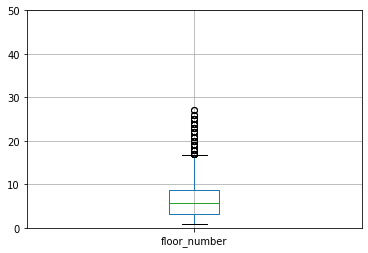

In [120]:
data.pivot_table(index='last_price_rub', values='floor_number').boxplot()
plt.ylim(0, 50)

In [121]:
data['floor_number'].describe()

count    23650.000000
mean         5.893277
std          4.883317
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor_number, dtype: float64

In [122]:
floor_number = data.groupby(['floor_number']).agg({'last_price_rub': ['count']})
grouping_floor_number = floor_number.pivot_table(index=['floor_number'], values='last_price_rub', aggfunc=['median'])
grouping_floor_number

,median
,count
floor_number,
1,2912
2,3353
3,3065
4,2802
5,2616
6,1302
7,1215
8,1083


<AxesSubplot:xlabel='floor_number'>

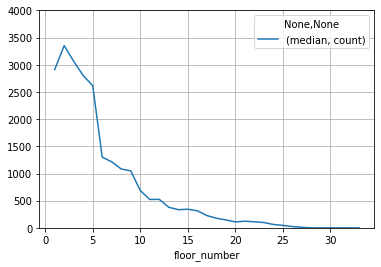

In [123]:
grouping_floor_number.plot(kind = 'line', ylim=(0, 4000), grid=True, alpha = 1)

0.026770434775958165

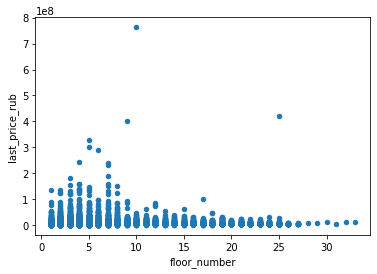

In [124]:
data.plot(kind = 'scatter', y = 'last_price_rub', x = 'floor_number', alpha = 1)
data['last_price_rub'].corr(data['floor_number'])

#### Данные представленных в колонке с этажом расположения недвижимости характеризуются относительно высоким стандартным отклонением, которое состовляет 4,88 и говорит о том, что данные неоднородны и возможно имеют небольшое количество случайных аномалий и выбросов.

### ТИП ЭТАЖА КВАРТИРЫ

In [125]:
last_price_type_floor = data.groupby(['type_floor']).agg({'last_price_rub': ['count', 'mean', 'median']})
grouping_last_price_type_floor = last_price_type_floor.pivot_table(index=['type_floor'])
grouping_last_price_type_floor

last_price_rub                         
                    count          mean     median
type_floor                                        
другой              17403  6.676444e+06  4850000.0
первый               2887  4.817890e+06  3900000.0
последний            3360  7.320907e+06  4300000.0

<AxesSubplot:xlabel='type_floor'>

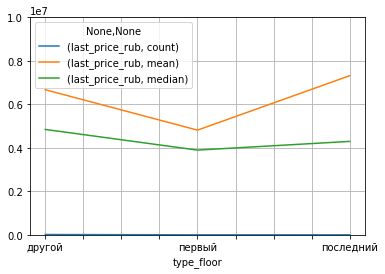

In [126]:
grouping_last_price_type_floor.plot(kind = 'line', ylim=(0, 10000000), grid=True, alpha = 1)

<AxesSubplot:xlabel='type_floor', ylabel='last_price_rub'>

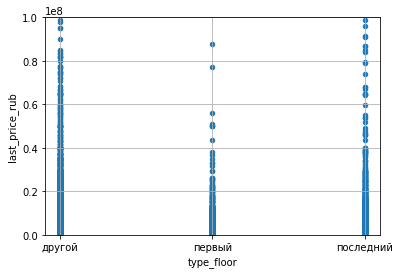

In [127]:
data.plot(kind = 'scatter', ylim=(0, 100000000), y = 'last_price_rub', x = 'type_floor', grid=True, alpha = 1)

array([[<AxesSubplot:title={'center':'другой'}>,
        <AxesSubplot:title={'center':'первый'}>],
       [<AxesSubplot:title={'center':'последний'}>, <AxesSubplot:>]],
      dtype=object)

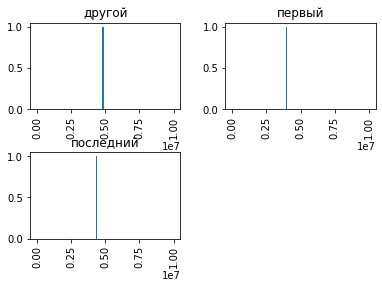

In [128]:
data.pivot_table(index='type_floor', values='last_price_rub', aggfunc='median').\
hist('last_price_rub', by='type_floor', range = (0, 10000000), bins=100)

#### Как видно квартиры на "других" этажах стоят больше чам на "первом" и "последнем" этажах, при этом квартиры на 1-м этаже стоят меньше чем на последнем.

### ОБЩЕЕ КОЛИЧЕСТВО ЭТАЖЕЙ В ДОМЕ

In [129]:
floors_total = data.groupby(['floors_total_quantity']).agg({'last_price_rub': ['count', 'mean', 'median']})
grouping_floors_total = floors_total.pivot_table(index=['floors_total_quantity'], values='last_price_rub', aggfunc=['median'])
grouping_floors_total

median                         
                       count          mean     median
floors_total_quantity                                
1                         25  2.788200e+06  2300000.0
2                        381  3.593340e+06  2050000.0
3                        667  5.914157e+06  3650000.0
4                       1193  8.058818e+06  5950000.0
5                       5775  5.193177e+06  3690000.0
6                        910  1.180108e+07  7900000.0
7                        589  1.396949e+07  7650000.0
8                        388  1.549825e+07  7226770.0
9                       3843  5.280151e+06  4400000.0
10                      1174  7.386674e+06  5200000.0
11                       202  9.024696e+06  6720000.0
12                      1361  6.174925e+06  4999000.0
13                       229  8.274687e+06  6200000.0
14                       553  5.852767e+06  4900000.0
15                       365  6.772942e+06  4950000.0
16                      1375  6.766545e+06  5450000.0
17                       833  6.083673e+06  5100000.0
18                       505  5.884754e+06  4800000.0
19                       339  6.288394e+06  5100000.0
20                       271  8.108593e+06  5999000.0
21                       158  5.812332e+06  4953668.0
22                       286  5.870238e+06  4875000.0
23                       349  5.951444e+06  5000000.0
24                       462  5.925344e+06  5000000.0
25                      1075  6.658507e+06  5239000.0
26                       124  5.164744e+06  4500000.0
27                       164  4.287979e+06  3795000.0
28                        21  6.327095e+06  6090000.0
29                         1  4.100000e+06  4100000.0
33                         1  9.900000e+06  9900000.0
34                         1  3.550000e+06  3550000.0
35                        24  6.796324e+06  6745000.0
36                         3  7.780000e+06  8150000.0
37                         1  4.100000e+06  4100000.0
52                         1  3.978000e+06  3978000.0
60                         1  3.800000e+06  3800000.0

-0.006765646411859116

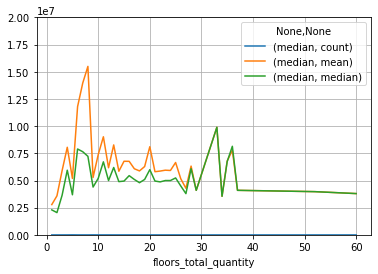

In [130]:
grouping_floors_total.plot(kind = 'line', ylim=(0, 20000000), grid=True, alpha = 1)
data['floors_total_quantity'].corr(data['last_price_rub'])

<div class="alert alert-block alert-warning">
 
### Комментарий ревьюера
    
#### Совет
    
Информативно вышло, только график по количеству не играет особой роли.

<AxesSubplot:xlabel='floors_total_quantity', ylabel='last_price_rub'>

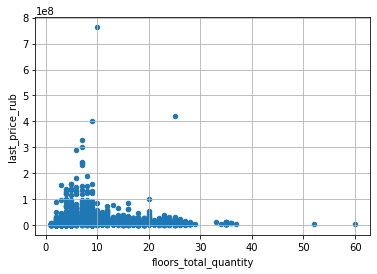

In [131]:
data.plot(kind = 'scatter', y = 'last_price_rub', x = 'floors_total_quantity', grid=True, alpha = 1)

#### Как видно из таблицы и графиков больше всего продается квартир в домах стандартной планировки имеющих 4, 5, 9, 10, 12 и 16 этажей при этом наибольшую стоимость имеют квартиры расположенные в 4, 5, 6, 7, 8 и 9 этажных зданиях. Зависмость цен объектов недвижимости от количества этажей в здании практически отсутствует.

### РАССТОЯНИЕ ДО ЦЕНТРА ГОРОДА В МЕТРАХ

In [132]:
city_centers_nearest = data.query('city_centers_nearest_m != 0').groupby(['city_centers_nearest_m', 'last_price_rub']).agg({'last_price_rub': ['sum']})
grouping_city_centers_nearest = city_centers_nearest.pivot_table(
    index=['city_centers_nearest_m'], values='last_price_rub', aggfunc=['median'])
grouping_city_centers_nearest

,median
,sum
city_centers_nearest_m,
181,31099000.0
208,5800000.0
215,10990000.0
287,9590000.0
291,11500000.0
...,...
64857,3650000.0
65105,3300000.0


<AxesSubplot:xlabel='city_centers_nearest_m'>

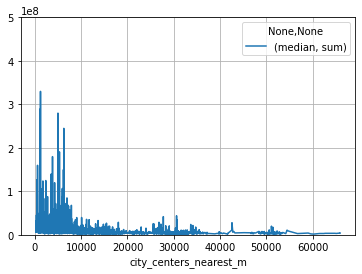

In [133]:
grouping_city_centers_nearest.plot(kind = 'line', ylim=(0, 500000000), grid=True, alpha = 1)

-0.06396963061352598

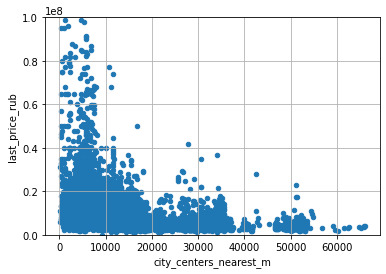

In [134]:
data.query('city_centers_nearest_m != 0').plot(kind = 'scatter', ylim=(0, 100000000), y = 'last_price_rub', x = 'city_centers_nearest_m', grid=True, alpha = 1)
data['last_price_rub'].corr(data['city_centers_nearest_m'])

#### Как видно из данного графика наибольшую стоимость имеют квартиры расположенные ближе к центру. Но при этом имеется очень слабая корреляционная зависимость между ними.

### РАССТОЯНИЕ ДО БЛИЖАЙШЕГО АЭРОПОРТА

In [135]:
airports_nearest = data.query('airports_nearest_m != 0').groupby(['airports_nearest_m', 'last_price_rub']).agg({'last_price_rub': ['sum']})
grouping_airports_nearest = airports_nearest.pivot_table(
    index=['airports_nearest_m'], values='last_price_rub', aggfunc=['median'])
grouping_airports_nearest

,median
,sum
airports_nearest_m,
6450,3233500.0
6914,2750000.0
6949,6490000.0
6989,6100000.0
6992,3090000.0
...,...
83758,3650000.0
84006,3300000.0


<AxesSubplot:xlabel='airports_nearest_m'>

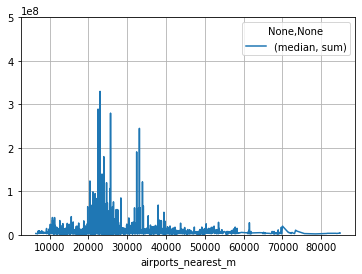

In [136]:
grouping_airports_nearest.plot(kind = 'line', ylim=(0, 500000000), grid=True, alpha = 1)

#### 

0.09162466446757363

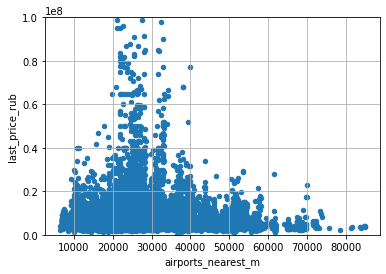

In [137]:
data.query('airports_nearest_m != 0').plot(kind = 'scatter', ylim=(0, 100000000), \
                                           y = 'last_price_rub', x = 'airports_nearest_m', grid=True, alpha = 1)
data['last_price_rub'].corr(data['airports_nearest_m'])

#### Как видно все объекты недвижимости находятся практически на расстоянии от 10000 до 40000 метров аэропорта. Здесь, также видно, что стоимость квартир очень слабо зависит от расстояния до аэропорта, квартиры с большей стоимостью находятся на расстоянии от 20000 до 30000 метров от аэропорта.

### РАССТОЯНИЕ ДО БЛИЖАЙШЕГО ПАРКА

In [138]:
parks_nearest = data.query('parks_nearest_m != 0').groupby(['parks_nearest_m']).agg({'last_price_rub': ['sum','count']})
grouping_parks_nearest = parks_nearest.pivot_table(index=['parks_nearest_m'], values='last_price_rub', aggfunc=['median'])

<AxesSubplot:xlabel='parks_nearest_m'>

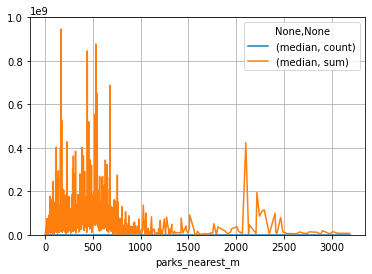

In [139]:
grouping_parks_nearest.plot(kind = 'line', ylim = (0, 1000000000), grid=True, alpha = 1)

0.11681367930756478

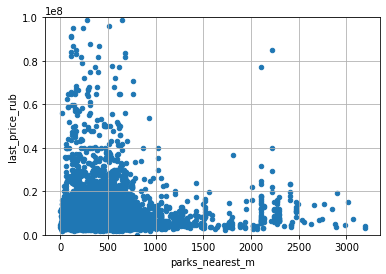

In [140]:
data.query('parks_nearest_m != 0').plot(kind = 'scatter', ylim=(0, 100000000), y = 'last_price_rub', x = 'parks_nearest_m', grid=True, alpha = 1)
data['last_price_rub'].corr(data['parks_nearest_m'])

#### Как видно из графиков больше всего объектов недвижимости распологается в непосредственной близости от парков, при этом квартиры, которые расположены ближе ближе к паркам стоят дороже, что также подтверждается коэффициентом корреляции, который равен 0,12.

### ДЕНЬ И МЕСЯЦ ПУБЛИКАЦИИ ОБЪЯВЛЕНИЯ

In [141]:
month_publication = data.groupby(['month_publication', 'last_price_rub']).agg({'last_price_rub':['count']})
grouping_month_publication = month_publication.pivot_table(
    index=['month_publication'], values='last_price_rub', aggfunc=['sum'])
grouping_month_publication.columns = ['sum']
grouping_month_publication.sort_values('month_publication', ascending=False).head(12)

,sum
month_publication,
Январь,1491
Февраль,2639
Сентябрь,1979
Октябрь,2124
Ноябрь,2367
Март,2582
Май,1270
Июнь,1755
Июль,1690


<AxesSubplot:xlabel='month_publication'>

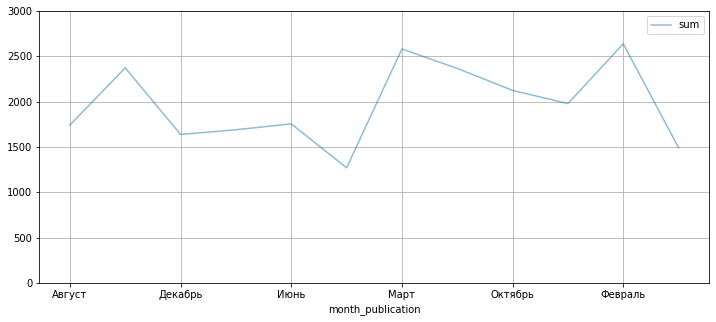

In [142]:
grouping_month_publication.plot(kind = 'line', ylim=(0, 3000), figsize=(12, 5), grid=True, alpha = 0.5)

<div class="alert alert-block alert-warning">
 
### Комментарий ревьюера
    
#### Совет
    
Правильнее их будет сортировать в логической последовательности

In [143]:
month_publication = data.groupby(['month_publication', 'last_price_rub']).agg({'last_price_rub':['sum']})
grouping_month_publication = month_publication.pivot_table(
    index=['month_publication'], values='last_price_rub', aggfunc=['count', 'median'])
grouping_month_publication

,count,median
,sum,sum
month_publication,,
Август,584,9970416.5
Апрель,685,9950000.0
Декабрь,617,9555000.0
Июль,592,9426744.5
Июнь,615,9840000.0
Май,476,9599500.0
Март,750,9485200.0
Ноябрь,699,10340000.0


<AxesSubplot:xlabel='month_publication'>

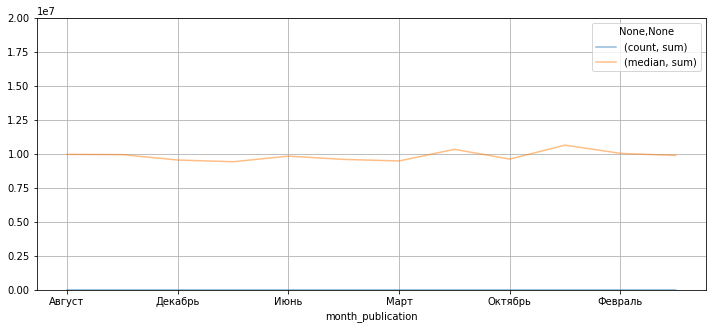

In [144]:
grouping_month_publication.plot(kind = 'line', ylim=(0, 20000000), figsize=(12, 5), grid=True, alpha = 0.5)

#### Если смотреть по месяцам то наибольше количество публикаций приходится на февраль, март и апрель, а наименьшее в ноябре. Стомость практически не зависит от месяца публикации.

In [145]:
day_week_publication = data.groupby(['day_week_publication', 'last_price_rub']).agg({'last_price_rub':['count']})
grouping_day_week_publication = day_week_publication.pivot_table(
    index=['day_week_publication'], values='last_price_rub', aggfunc=['sum'])
grouping_day_week_publication

,sum
,count
day_week_publication,
0,3606
1,4175
2,3966
3,4286
4,3992
5,1933
6,1692


0.0016068614793023977

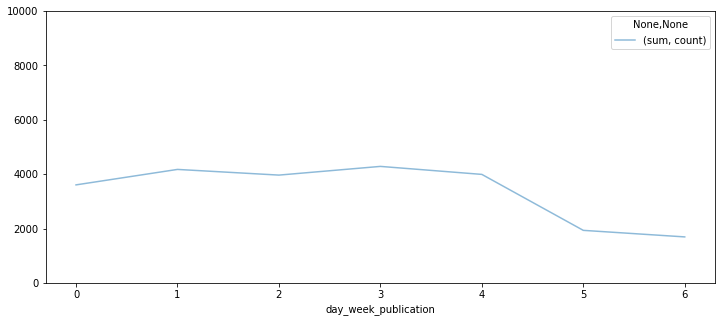

In [146]:
grouping_day_week_publication.plot(kind = 'line', ylim=(0, 10000), figsize=(12, 5), alpha = 0.5)
data['last_price_rub'].corr(data['day_week_publication'])

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
В выходные дни люди меньше всего публикуют объявлений.

#### Если оценивать публикации по дням недели то наибольше количество публикаций приходится на будние дни, а наименьшее на выходные, при этом день недели никак не влияет на стоимость.

### Изучим, как быстро продавались квартиры. Столбец "days_exposition" показывает, сколько дней было размещено каждое объявление

<AxesSubplot:ylabel='Frequency'>

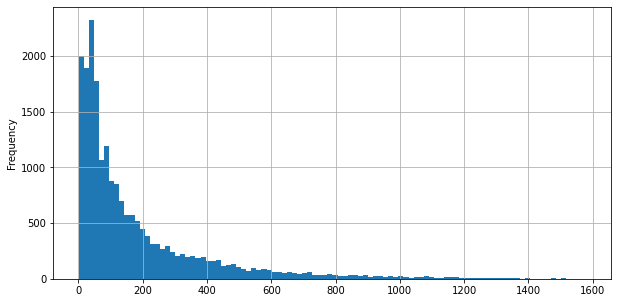

In [147]:
data['days_exposition_quantity'].plot(kind = 'hist', bins = 100, grid = True, figsize=(10, 5))

In [148]:
data['days_exposition_quantity'].describe()

count    20470.000000
mean       180.753200
std        219.777916
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition_quantity, dtype: float64

In [149]:
days_exposition = data.groupby(['days_exposition_quantity', 'last_price_rub']).agg({'last_price_rub':['sum']})
grouping_days_exposition = data.pivot_table(
    index=['days_exposition_quantity'], values='last_price_rub', aggfunc=['count', 'mean', 'median'])
grouping_days_exposition.columns = ['count', 'mean', 'median']
grouping_days_exposition.sort_values('count', ascending=False).head(10)

,count,mean,median
days_exposition_quantity,,,
45.0,879,3.318168e+06,3250000.0
60.0,538,6.025421e+06,5776000.0
7.0,234,5.126271e+06,4490000.0
30.0,208,5.811157e+06,4657500.0
90.0,203,1.394544e+07,11900000.0
4.0,174,5.323743e+06,4495000.0
3.0,158,5.056824e+06,4175000.0
5.0,152,6.485962e+06,4350000.0
14.0,148,6.929938e+06,4650000.0


<AxesSubplot:xlabel='days_exposition_quantity'>

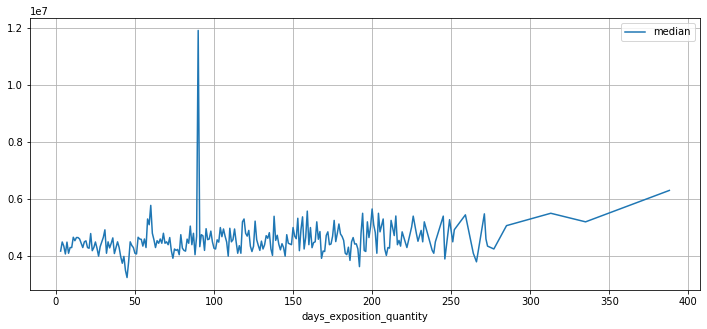

In [150]:
grouping_days_exposition.query('count > 20').plot(y = 'median', grid = True, figsize=(12, 5))

In [151]:
data['last_price_rub'].corr(data['days_exposition_quantity'])

0.08093749597559405

#### Как видно из таблицы продажи как правило занимают от 45 до 198 дней, при этом медианное время состовляет 45 дней. Быстрыми могут быть продажи, которые совершаются до 45 дней, а необычайно долгими продажи, которые превышают 198 дней.  Большая часть объявлений снимается на 90 день, этот указывает на то, что в этот день квартиры бывают не только проданы но и могут сниматся администраторами сайта либо политикой информационнго ресурса. Также можно сказать между этими 2-я характеристиками есть слабая корреляционная зависимость.

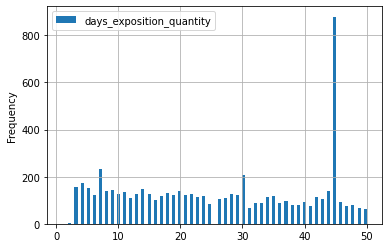

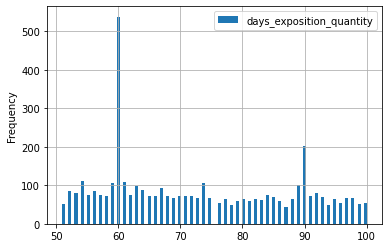

In [152]:
data.plot(y = 'days_exposition_quantity', kind = 'hist', bins = 100, grid = True, range = (1, 50))
data.plot(y = 'days_exposition_quantity', kind = 'hist', bins = 100, grid = True, range = (51, 100))
plt.show()

**Дополнительно: Большая часть объявлений снимается на 7, 30, 45, 60 и 90 день, этот указывает на то, что в этот день квартиры бывают не только проданы но и могут сниматся администраторами сайта либо политикой информационного ресурса.**

<div class="alert alert-block alert-danger">
 
### Комментарий ревьюера
    
#### Ошибка
    
Стоит рассмотреть график чуть более подробно. На нем будет несколько выбросов. Надо показать их на графике и высказаться о причинах возникновения. 

<div class="alert alert-block alert-success">
 
# Комментарий ревьюера ver.2 
    
#### Успех
    
Все так и есть. В эти дни система убирает с показа бесплатные объявления

### Определим какие факторы больше всего влияют на общую (полную) стоимость объекта. 

**Изучим, зависит ли цена от:**

общей площади;

жилой площади;

площади кухни;

количества комнат;

этажа, на котором расположена квартира (первый, последний, другой);

даты размещения (день недели, месяц, год).

### Изучим зависит ли цена от общей площади

In [153]:
total_area = data.query('total_area_m2 != 0').groupby(['total_area_m2', 'last_price_rub']).agg({'last_price_rub':['sum']})
grouping_total_area = total_area.pivot_table(
    index=['total_area_m2'], values='last_price_rub', aggfunc=['count', 'max', 'min', 'mean', 'median'])
grouping_total_area.columns = ['count', 'max', 'min', 'mean', 'median']
grouping_total_area.sort_values('count', ascending=False).head(20)

,count,max,min,mean,median
total_area_m2,,,,,
60.0,180,40800000.0,880000.0,1.076728e+07,8045000.0
42.0,175,58500000.0,450000.0,8.424271e+06,4950000.0
45.0,168,54000000.0,565000.0,1.006625e+07,5049500.0
43.0,162,32800000.0,600000.0,7.127154e+06,4960000.0
44.0,156,41000000.0,720000.0,8.011737e+06,5325000.0
36.0,152,30600000.0,550000.0,6.207667e+06,4287500.0
40.0,150,38700000.0,440000.0,8.105193e+06,5100000.0
31.0,143,49600000.0,580000.0,7.008098e+06,3750000.0
50.0,140,43000000.0,1300000.0,9.568626e+06,6775000.0


<AxesSubplot:xlabel='total_area_m2'>

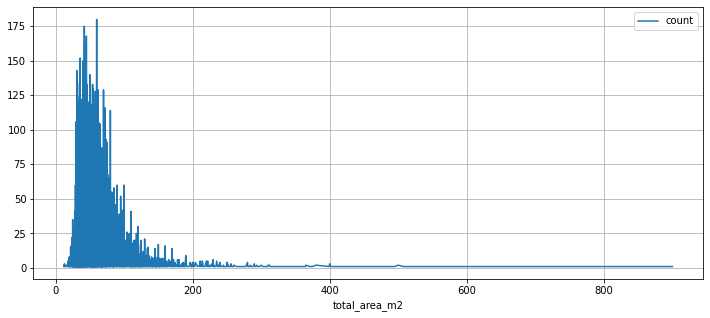

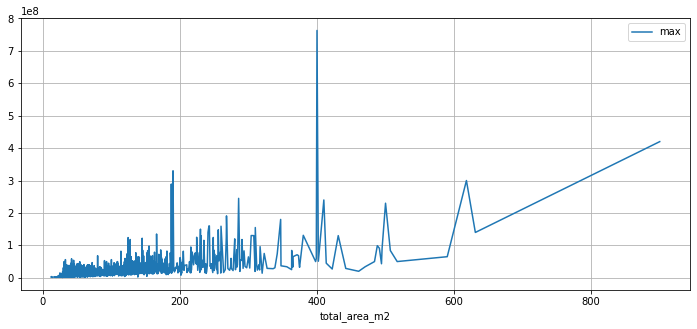

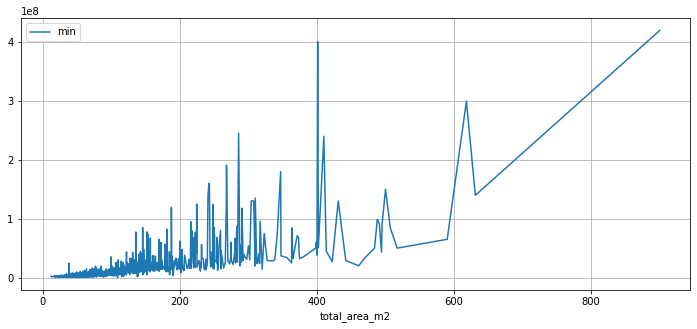

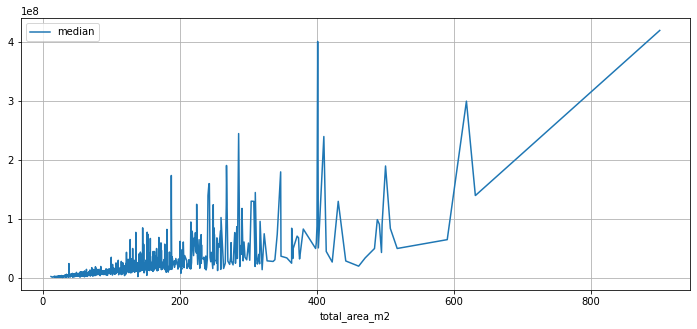

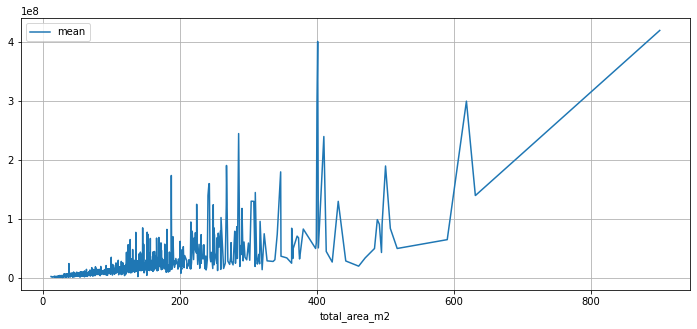

In [154]:
grouping_total_area.plot(y = 'count', grid = True, figsize=(12, 5))
grouping_total_area.plot(y = 'max', grid = True, figsize=(12, 5))
grouping_total_area.plot(y = 'min', grid = True, figsize=(12, 5))
grouping_total_area.plot(y = 'median', grid = True, figsize=(12, 5))
grouping_total_area.plot(y = 'mean', grid = True, figsize=(12, 5))

In [155]:
data['last_price_rub'].corr(data['total_area_m2'])

0.6537428966335393

#### На графиках видно есть очень сильная зависимость цены от площади объекта, с возрастанием площади возрастает и цена, на это также указывает высокий коэффиюциент корреляции равеный 0,65

### Изучим зависит ли цена от жилой площади

In [156]:
living_area = data.query('living_area_m2 != 0').groupby(['living_area_m2', 'last_price_rub']).agg({'last_price_rub':['sum']})
grouping_living_area = living_area.pivot_table(
    index=['living_area_m2'], values='last_price_rub', aggfunc=['count', 'max', 'min', 'mean', 'median'])
grouping_living_area.columns = ['count', 'max', 'min', 'mean', 'median']
grouping_living_area.sort_values('living_area_m2', ascending=False).head(20)

,count,max,min,mean,median
living_area_m2,,,,,
409.7,1,420000000.0,420000000.0,420000000.0,420000000.0
409.0,1,65000000.0,65000000.0,65000000.0,65000000.0
347.5,1,91500000.0,91500000.0,91500000.0,91500000.0
332.0,1,50000000.0,50000000.0,50000000.0,50000000.0
322.3,1,140000000.0,140000000.0,140000000.0,140000000.0
312.5,1,49950000.0,49950000.0,49950000.0,49950000.0
301.5,1,84000000.0,84000000.0,84000000.0,84000000.0
300.0,1,51000000.0,51000000.0,51000000.0,51000000.0
279.6,1,20000000.0,20000000.0,20000000.0,20000000.0


<AxesSubplot:xlabel='living_area_m2'>

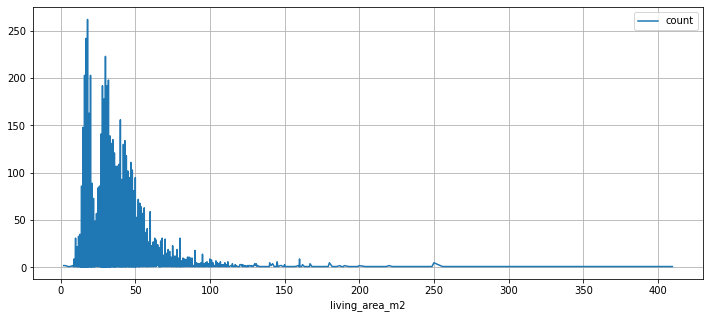

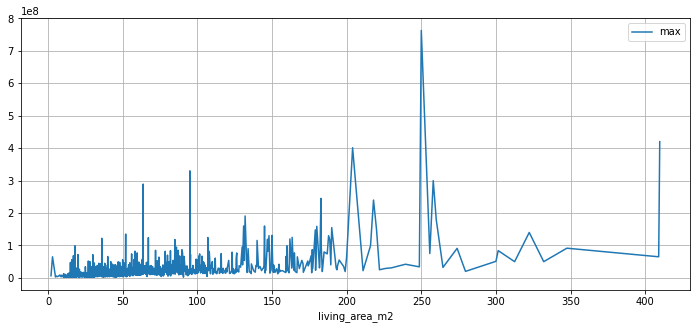

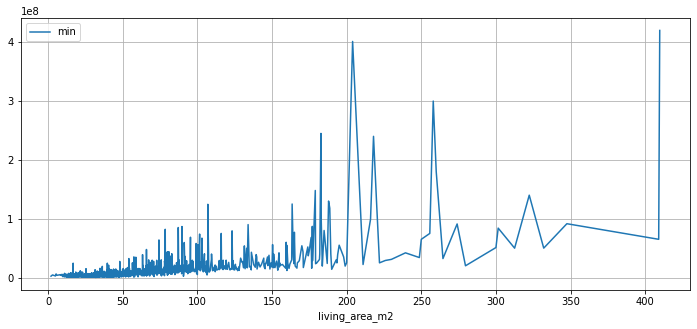

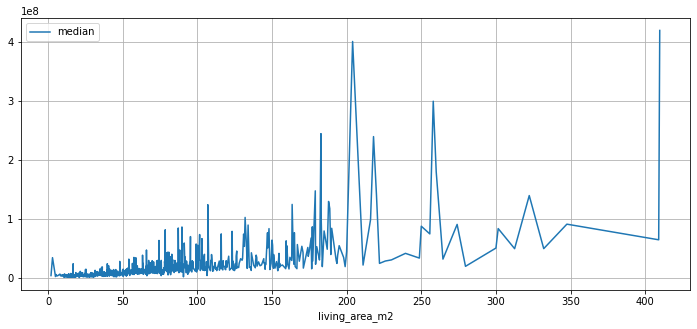

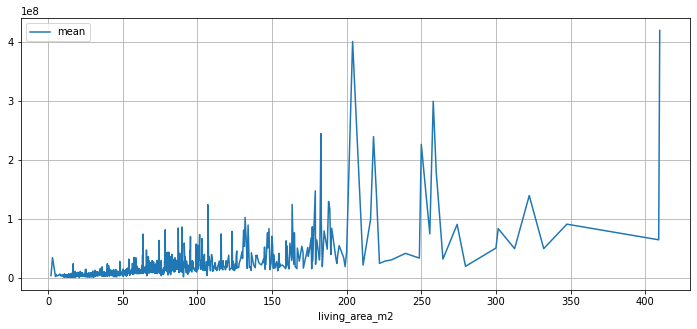

In [157]:
grouping_living_area.plot(y = 'count', grid = True, figsize=(12, 5))
grouping_living_area.plot(y = 'max', grid = True, figsize=(12, 5))
grouping_living_area.plot(y = 'min', grid = True, figsize=(12, 5))
grouping_living_area.plot(y = 'median', grid = True, figsize=(12, 5))
grouping_living_area.plot(y = 'mean', grid = True, figsize=(12, 5))

In [158]:
data['last_price_rub'].corr(data['living_area_m2'])

0.4908382823323184

#### Площадь под графиком показывает область цен. Как видим отчетливо видна сильная зависимость цены от площади жилой недвижимости, с возрастанием площади возрастает и цена, на это указывает высокий коэффиюциент корреляции равный 0,49, но она менее сильная чем зависимость цены от общей площади объекта недвижимости. Пик около нуля свидетельствует о значительном количестве объектов недвижимсти в, которых отсутсвует параметр жилой площади.

### Изучим зависит ли цена от площади кухни

In [159]:
kitchen_area = data.query('kitchen_area_m2 != 0').groupby(['kitchen_area_m2', 'last_price_rub']).agg({'last_price_rub':['sum']})
grouping_kitchen_area = kitchen_area.pivot_table(
    index=['kitchen_area_m2'], values='last_price_rub', aggfunc=['count', 'max', 'min', 'mean', 'median'])
grouping_kitchen_area.columns = ['count', 'max', 'min', 'mean', 'median']
grouping_kitchen_area.sort_values('count', ascending=False).head(20)

,count,max,min,mean,median
kitchen_area_m2,,,,,
10.0,411,110400000.0,1050000.0,1.763873e+07,9140000.0
9.0,349,72000000.0,470000.0,1.486623e+07,8250000.0
8.0,347,98800000.0,550000.0,1.512751e+07,8100000.0
11.0,324,83820000.0,850000.0,1.491824e+07,9300000.0
12.0,314,130000000.0,790000.0,1.592043e+07,10625000.0
6.0,311,102500000.0,430000.0,1.395190e+07,5798000.0
7.0,281,121600000.0,700000.0,1.573904e+07,6900000.0
14.0,231,69000000.0,600000.0,1.387773e+07,10800000.0
15.0,227,74000000.0,1550000.0,1.448684e+07,10650000.0


<AxesSubplot:xlabel='kitchen_area_m2'>

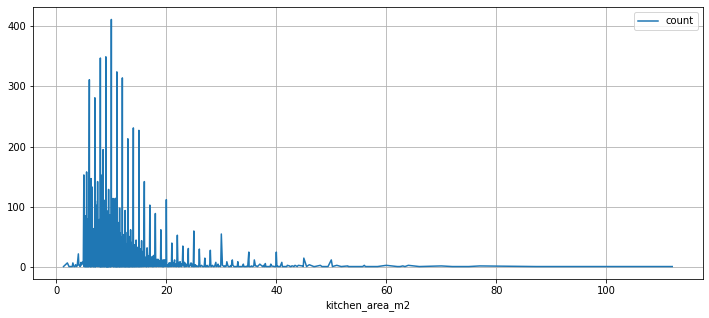

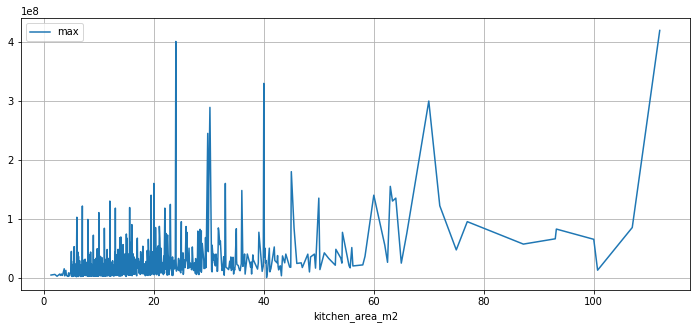

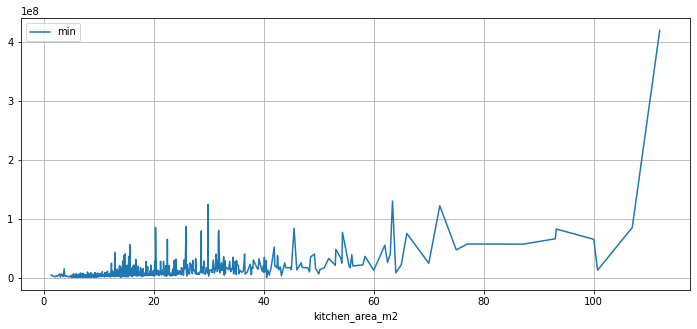

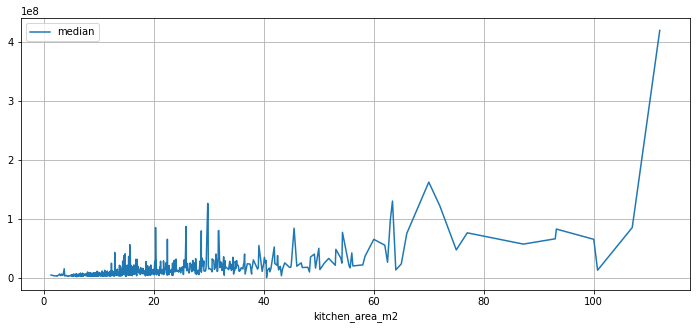

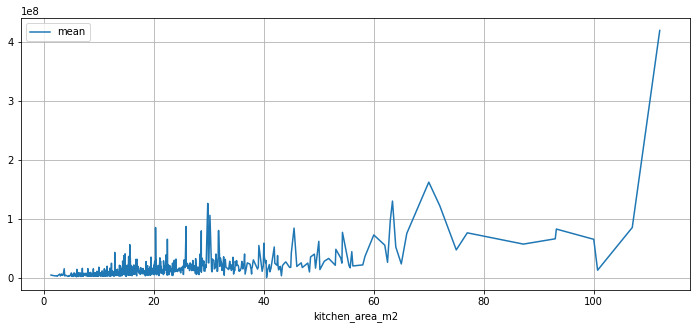

In [160]:
grouping_kitchen_area.plot(y = 'count', grid = True, figsize=(12, 5))
grouping_kitchen_area.plot(y = 'max', grid = True, figsize=(12, 5))
grouping_kitchen_area.plot(y = 'min', grid = True, figsize=(12, 5))
grouping_kitchen_area.plot(y = 'median', grid = True, figsize=(12, 5))
grouping_kitchen_area.plot(y = 'mean', grid = True, figsize=(12, 5))

In [161]:
data['last_price_rub'].corr(data['kitchen_area_m2'])

0.38671100562027044

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Небольшая связь тут прослеживается

#### Площадь под графиком показывает область цен. Как видим отчетливо видна зависимость цены от площади кухни, с возрастанием площади возрастает и цена, на это указывает значительный коэффиюциент корреляции равный 0,39, но она менее сильная чем зависимость цены от общей площади объекта недвижимости и его жилой площади. Пик около нуля свидетельствует о значительном количестве объектов недвижимсти в которых отсутсвует параметр площади кухни.

### Изучим зависит ли цена от колличества комнат

In [162]:
rooms_quantity = data.groupby(['rooms_quantity', 'last_price_rub']).agg({'last_price_rub':['sum']})
grouping_rooms_quantity = rooms_quantity.pivot_table(
    index=['rooms_quantity'], values='last_price_rub', aggfunc=['count', 'max', 'min', 'mean', 'median'])
grouping_rooms_quantity.columns = ['count', 'max', 'min', 'mean', 'median']
grouping_rooms_quantity.sort_values('count', ascending=False).head(20)

,count,max,min,mean,median
rooms_quantity,,,,,
2,1365,583000000.0,12190.0,3.245431e+07,9272765.0
3,1246,526500000.0,550000.0,3.806572e+07,13445000.0
1,1227,598500000.0,430000.0,2.511057e+07,6204472.0
4,544,159984000.0,999000.0,2.901181e+07,18300000.0
5,209,401300000.0,1650000.0,3.706430e+07,22900000.0
0,100,71000000.0,945750.0,6.575316e+06,4150000.0
6,87,245000000.0,4390000.0,3.827039e+07,23400000.0
7,50,763000000.0,7900000.0,6.073468e+07,30050000.0
8,12,180000000.0,15800000.0,5.022417e+07,23095000.0


<AxesSubplot:xlabel='rooms_quantity'>

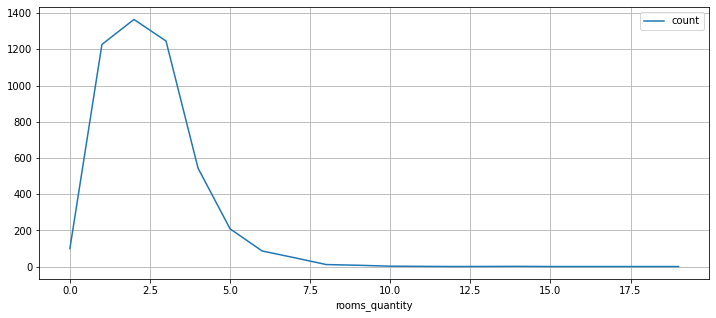

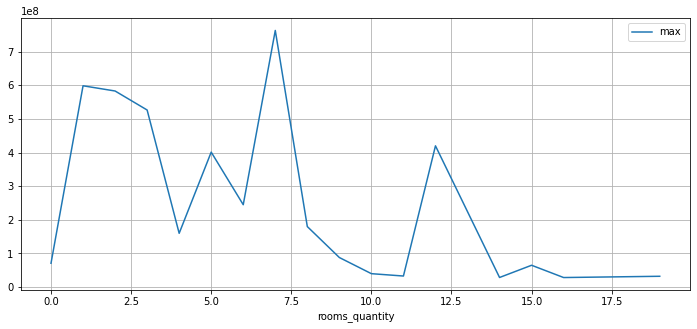

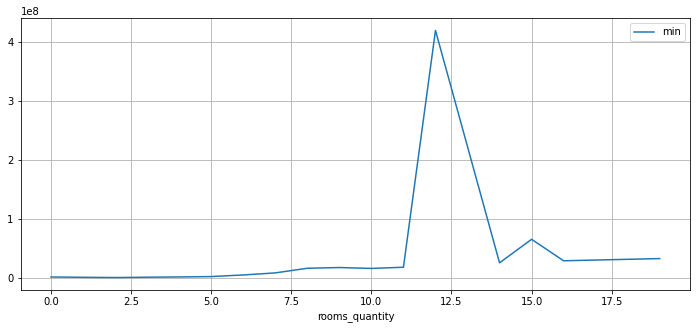

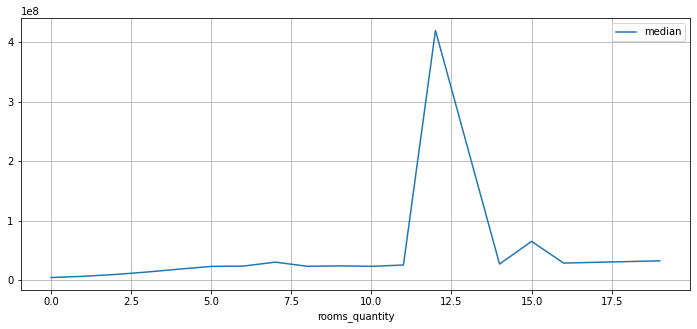

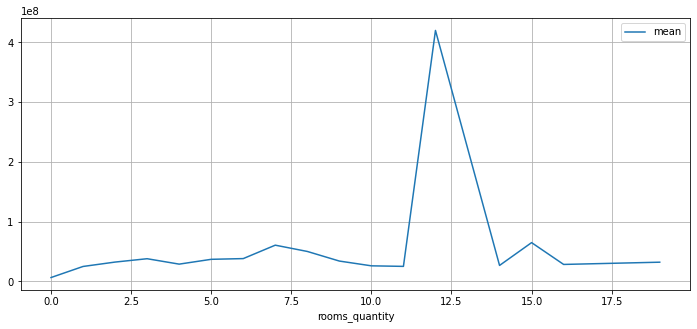

In [163]:
grouping_rooms_quantity.plot(y = 'count', grid = True, figsize=(12, 5))
grouping_rooms_quantity.plot(y = 'max', grid = True, figsize=(12, 5))
grouping_rooms_quantity.plot(y = 'min', grid = True, figsize=(12, 5))
grouping_rooms_quantity.plot(y = 'median', grid = True, figsize=(12, 5))
grouping_rooms_quantity.plot(y = 'mean', grid = True, figsize=(12, 5))

**Как мы видим на графике присутсвует пик в районе числа комнат равным 12. Скорее всего это выброс (очень редкое значение), редкими можно считать количество комнат больше 8-ми. Отсечем их и повторно проанализируем эти характеристики.**

In [164]:
data_v1 = data[(data['rooms_quantity'] < 8)]
data_v1

,locality_name,total_area_m2,living_area_m2,kitchen_area_m2,last_price_rub,is_apartment,is_studio,is_open_plan,rooms_quantity,ceiling_height_m,...,ponds_in_3km_quantity,total_images_quantity,data_start_exposition,days_exposition_quantity,square_meter_rub,day_week_publication,month_publication,year_publication,type_floor,to_city_centers_km
0,Санкт-Петербург,108.00,51.0,25.00,13000000.0,False,False,False,3,2.70,...,2,20,2019-03-07,NaN,120370,3,Март,2019,другой,16
1,поселок Шушары,40.40,18.6,11.00,3350000.0,False,False,False,1,2.65,...,0,7,2018-12-04,81.0,82920,1,Декабрь,2018,первый,18
2,Санкт-Петербург,56.00,34.3,8.30,5196000.0,False,False,False,2,2.65,...,2,10,2015-08-20,558.0,92785,3,Август,2015,другой,13
3,Санкт-Петербург,159.00,0.0,0.00,64900000.0,True,False,False,3,2.65,...,3,0,2015-07-24,424.0,408176,4,Июль,2015,другой,6
4,Санкт-Петербург,100.00,32.0,41.00,10000000.0,False,False,False,2,3.03,...,1,2,2018-06-19,121.0,100000,1,Июнь,2018,другой,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,Санкт-Петербург,133.81,73.3,13.83,9700000.0,False,False,False,3,3.70,...,3,9,2017-03-21,NaN,72490,1,Март,2017,другой,4
23695,Тосно,59.00,38.0,8.50,3100000.0,False,False,False,3,2.65,...,0,14,2018-01-15,45.0,52542,0,Январь,2018,другой,0
23696,деревня Рождествено,56.70,29.7,0.00,2500000.0,False,False,False,2,2.65,...,0,18,2018-02-11,NaN,44091,6,Февраль,2018,первый,0
23697,Санкт-Петербург,76.75,0.0,23.30,11475000.0,True,False,False,2,3.00,...,3,13,2017-03-28,602.0,149511,1,Март,2017,другой,10


In [165]:
rooms_quantity = data_v1.groupby(['rooms_quantity', 'last_price_rub']).agg({'last_price_rub':['sum']})
grouping_rooms_quantity = rooms_quantity.pivot_table(
    index=['rooms_quantity'], values='last_price_rub', aggfunc=['count', 'max', 'min', 'mean', 'median'])
grouping_rooms_quantity.columns = ['count', 'max', 'min', 'mean', 'median']
grouping_rooms_quantity.sort_values('count', ascending=False).head(20)

,count,max,min,mean,median
rooms_quantity,,,,,
2,1365,583000000.0,12190.0,3.245431e+07,9272765.0
3,1246,526500000.0,550000.0,3.806572e+07,13445000.0
1,1227,598500000.0,430000.0,2.511057e+07,6204472.0
4,544,159984000.0,999000.0,2.901181e+07,18300000.0
5,209,401300000.0,1650000.0,3.706430e+07,22900000.0
0,100,71000000.0,945750.0,6.575316e+06,4150000.0
6,87,245000000.0,4390000.0,3.827039e+07,23400000.0
7,50,763000000.0,7900000.0,6.073468e+07,30050000.0


<AxesSubplot:xlabel='rooms_quantity'>

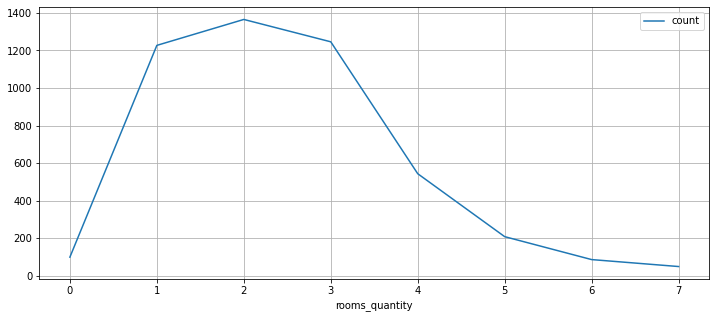

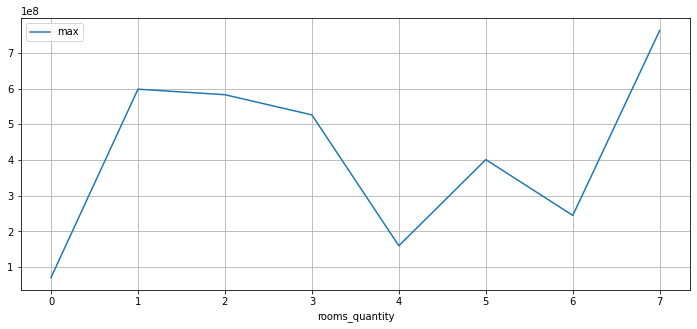

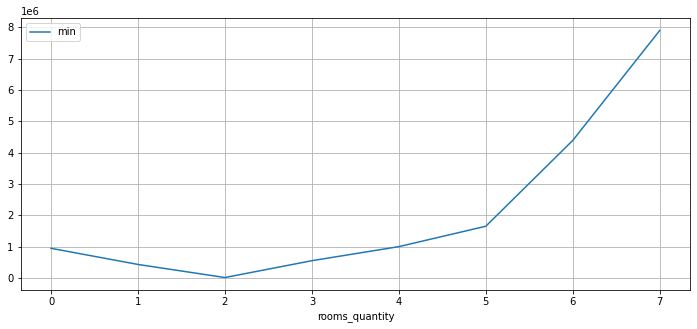

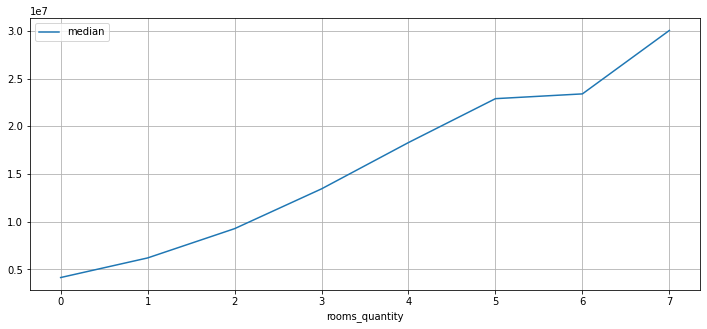

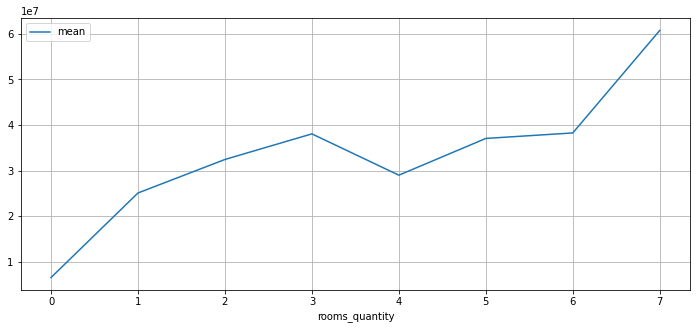

In [166]:
grouping_rooms_quantity.plot(y = 'count', grid = True, figsize=(12, 5))
grouping_rooms_quantity.plot(y = 'max', grid = True, figsize=(12, 5))
grouping_rooms_quantity.plot(y = 'min', grid = True, figsize=(12, 5))
grouping_rooms_quantity.plot(y = 'median', grid = True, figsize=(12, 5))
grouping_rooms_quantity.plot(y = 'mean', grid = True, figsize=(12, 5))

In [167]:
data['last_price_rub'].corr(data['rooms_quantity'])

0.36342062218770704

#### Площадь под графиком показывает область цен. Как видим отчетливо видна зависимость цены от количества комнат, с возрастанием количества комнат возрастает и цена, на это указывает значительный коэффиюциент корреляции равный 0,36, но она менее сильная чем зависимость цены от общей площади объекта недвижимости и его жилой площади

### Изучим зависит ли цена от этажа, на котором расположена квартира (первый, последний, другой);

In [168]:
data_type_floor = data.groupby(['type_floor', 'last_price_rub']).agg({'last_price_rub':['sum']})
grouping_data_type_floor = data_type_floor.pivot_table(
    index=['type_floor'], values='last_price_rub', aggfunc=['count', 'max', 'min', 'mean', 'median'])
grouping_data_type_floor.columns = ['count', 'max', 'min', 'mean', 'median']
grouping_data_type_floor.sort_values('count', ascending=False).head(20)

,count,max,min,mean,median
type_floor,,,,,
другой,2549,1.188000e+09,470000.0,4.558264e+07,10949000.0
последний,852,7.630000e+08,12190.0,2.887118e+07,11996500.0
первый,657,1.640000e+08,430000.0,2.117085e+07,7940000.0


<AxesSubplot:xlabel='type_floor'>

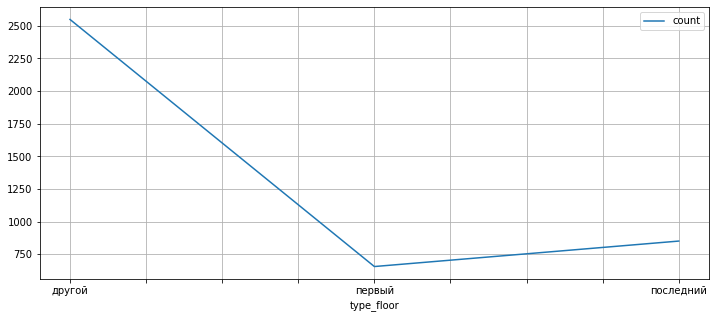

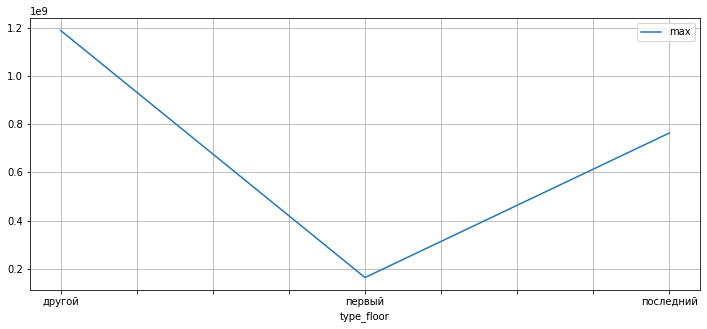

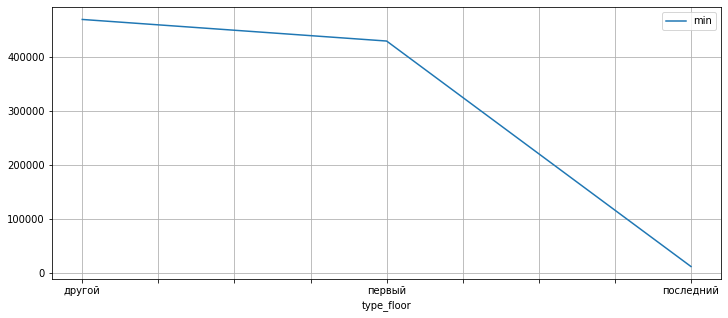

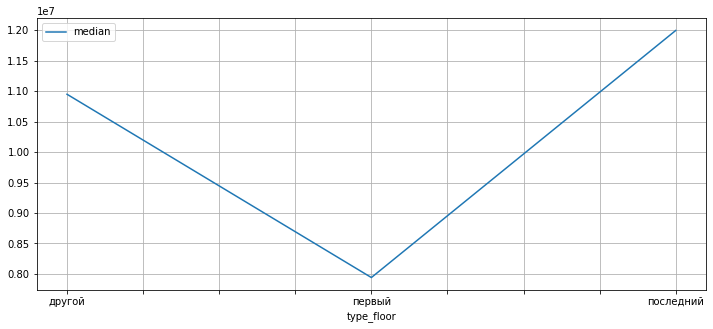

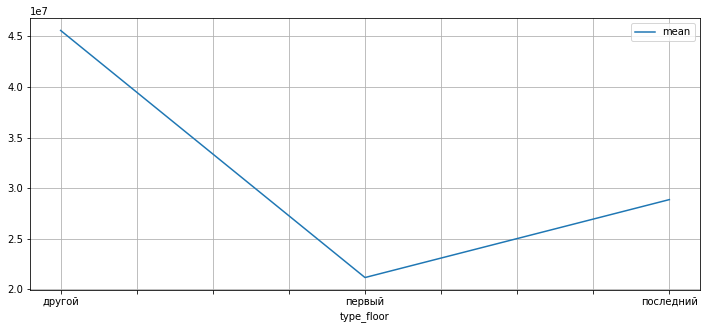

In [169]:
grouping_data_type_floor.plot(y = 'count', grid = True, figsize=(12, 5))
grouping_data_type_floor.plot(y = 'max', grid = True, figsize=(12, 5))
grouping_data_type_floor.plot(y = 'min', grid = True, figsize=(12, 5))
grouping_data_type_floor.plot(y = 'median', grid = True, figsize=(12, 5))
grouping_data_type_floor.plot(y = 'mean', grid = True, figsize=(12, 5))

#### Из графиков видно, что квартиры продающиеся на первом этаже самые дешевые, при этом квартиры на последнем этаже стоят дешевле, чем на других этажах.

### Изучим зависит ли цена от параметров даты размещения (день недели, месяц, год).

In [170]:
day_week = data.groupby(['day_week_publication', 'last_price_rub']).agg({'last_price_rub':['sum']})
grouping_day_week = day_week.pivot_table(
    index=['day_week_publication'], values='last_price_rub', aggfunc=['count', 'max', 'min', 'mean', 'median'])
grouping_day_week.columns = ['count', 'max', 'min', 'mean', 'median']
grouping_day_week.sort_values('count', ascending=False).head(20)

,count,max,min,mean,median
day_week_publication,,,,,
3,1044,306000000.0,450000.0,2.755424e+07,10622469.5
1,1031,289238400.0,430000.0,2.589141e+07,10150000.0
2,985,420000000.0,12190.0,2.668058e+07,9649000.0
4,952,252000000.0,450000.0,2.668856e+07,10084250.0
0,945,300000000.0,430000.0,2.484444e+07,9635328.0
5,607,763000000.0,550000.0,2.223590e+07,9470000.0
6,587,130000000.0,480000.0,1.801349e+07,8690000.0


<AxesSubplot:xlabel='day_week_publication'>

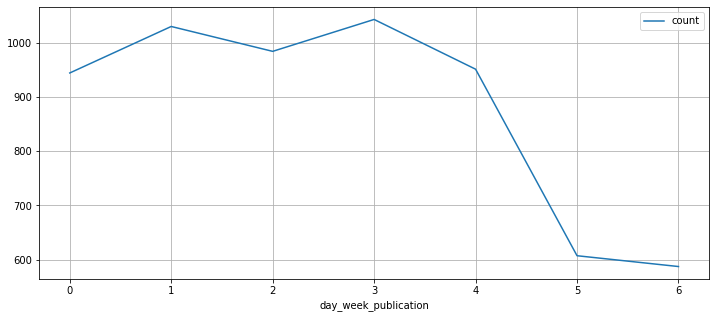

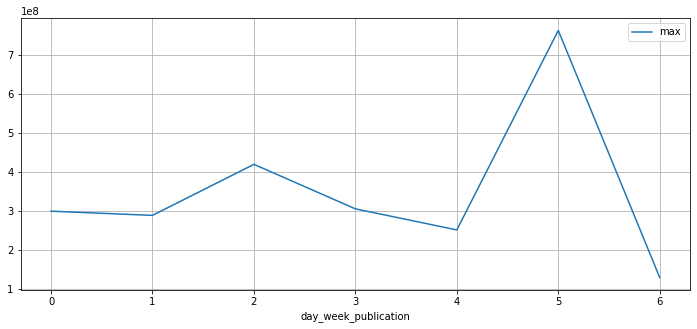

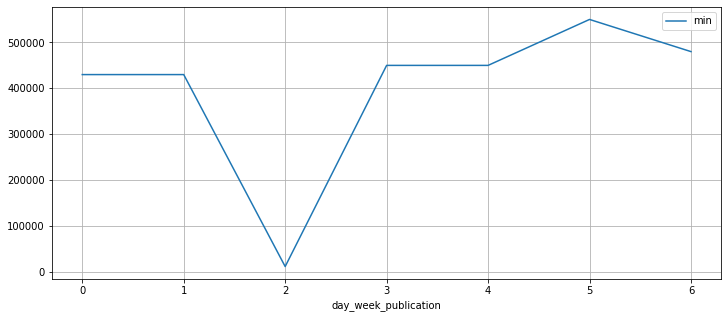

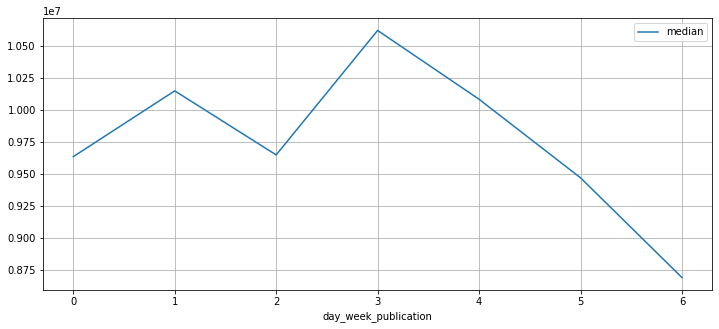

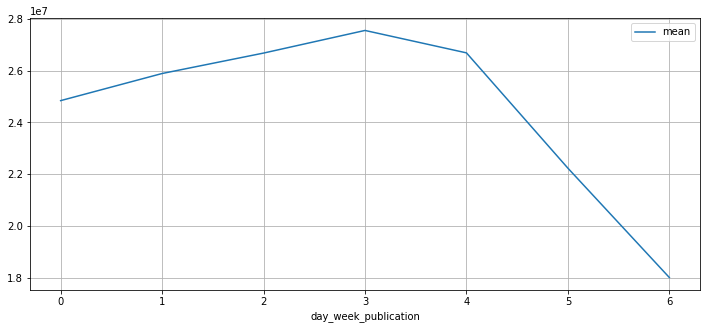

In [171]:
grouping_day_week.plot(y = 'count', grid = True, figsize=(12, 5))
grouping_day_week.plot(y = 'max', grid = True, figsize=(12, 5))
grouping_day_week.plot(y = 'min', grid = True, figsize=(12, 5))
grouping_day_week.plot(y = 'median', grid = True, figsize=(12, 5))
grouping_day_week.plot(y = 'mean', grid = True, figsize=(12, 5))

<div class="alert alert-block alert-danger">
 
### Комментарий ревьюера
    
#### Ошибка
    
Для дня, месяца и года публикации нет смысла считать корреляцию. У этих показателей нет линейной связи и вывод о зависимости можно сделать только по графику.

<div class="alert alert-block alert-success">
 
# Комментарий ревьюера ver.2 
    
#### Успех
    
Исправлено

**На графиках видно, что количество публикаций максимально во вторник, среду и четверг, а минимально в выходные дни, при этом усредненная цена в буние дни также возрастает, максимальное её значение наблюдается в четверг.**

In [172]:
month_publication = data.groupby(['month_publication', 'last_price_rub']).agg({'last_price_rub':['sum']})
grouping_month_publication = month_publication.pivot_table(
    index=['month_publication'], values='last_price_rub', aggfunc=['sum', 'count', 'max', 'min', 'mean', 'median'])
grouping_month_publication.columns = ['sum', 'count', 'max', 'min', 'mean', 'median']
grouping_month_publication.head(20)

,sum,count,max,min,mean,median
month_publication,,,,,,
Август,1.106665e+10,584,159984000.0,450000.0,1.894974e+07,9970416.5
Апрель,1.600036e+10,685,330000000.0,430000.0,2.335819e+07,9950000.0
Декабрь,1.147475e+10,617,420000000.0,490000.0,1.859765e+07,9555000.0
Июль,1.122386e+10,592,140000000.0,440000.0,1.895922e+07,9426744.5
Июнь,1.107613e+10,615,124480000.0,430000.0,1.800997e+07,9840000.0
Май,8.375367e+09,476,230000000.0,490000.0,1.759531e+07,9599500.0
Март,1.642906e+10,750,289238400.0,12190.0,2.190541e+07,9485200.0
Ноябрь,1.529427e+10,699,162000000.0,560000.0,2.188022e+07,10340000.0
Октябрь,1.324349e+10,700,170000000.0,600000.0,1.891927e+07,9622464.0


<AxesSubplot:xlabel='month_publication'>

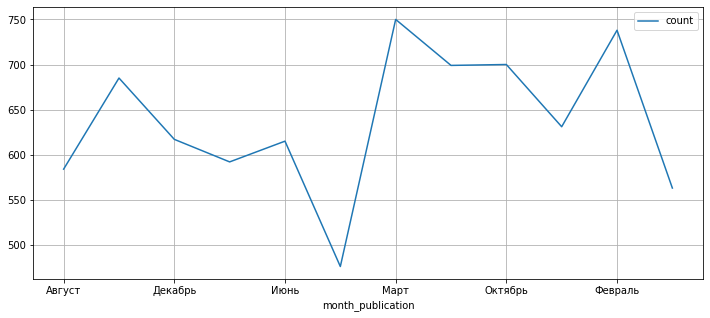

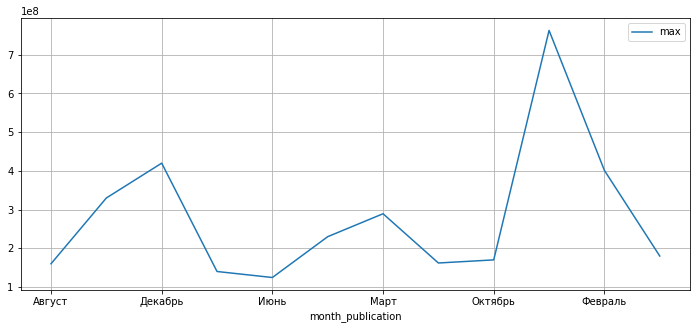

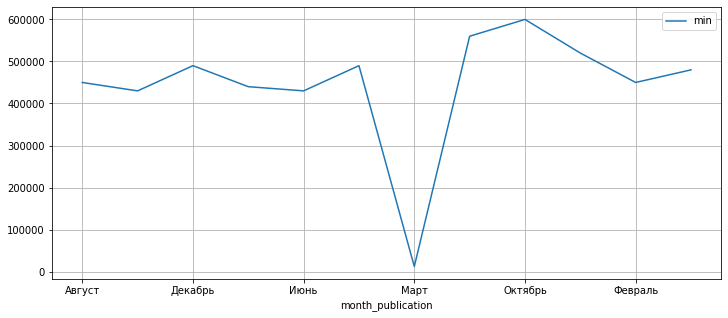

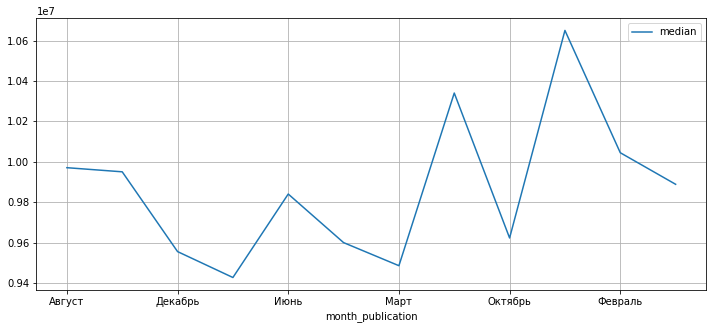

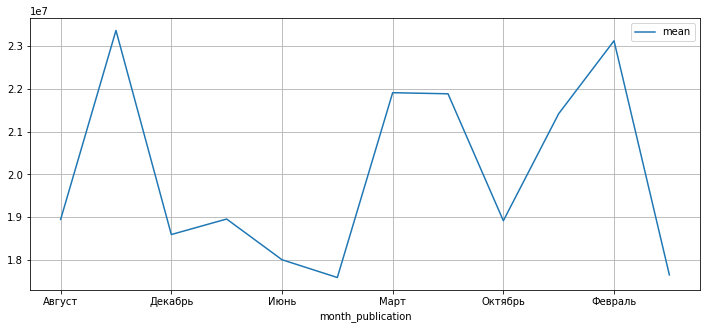

In [173]:
grouping_month_publication.plot(y = 'count', grid = True, figsize=(12, 5))
grouping_month_publication.plot(y = 'max', grid = True, figsize=(12, 5))
grouping_month_publication.plot(y = 'min', grid = True, figsize=(12, 5))
grouping_month_publication.plot(y = 'median', grid = True, figsize=(12, 5))
grouping_month_publication.plot(y = 'mean', grid = True, figsize=(12, 5))

**Как видно из графиков и таблицы количество объектов недвижимости увеливается в феврале, марте, апреле, октябре и ноябре, и в эти же месяцы немного возрастает усредненная цена.**

In [174]:
year_publication = data.groupby(['year_publication', 'last_price_rub']).agg({'last_price_rub':['sum']})
grouping_year_publication = year_publication.pivot_table(
    index=['year_publication'], values='last_price_rub', aggfunc=['sum', 'count', 'max', 'min', 'mean', 'median'])
grouping_year_publication.columns = ['sum', 'count', 'max', 'min', 'mean', 'median']
grouping_year_publication

,sum,count,max,min,mean,median
year_publication,,,,,,
2014,1.638338e+09,124,79339000.0,1200000.0,1.321240e+07,9584000.0
2015,1.007927e+10,556,180000000.0,650000.0,1.812818e+07,10493815.5
2016,1.888333e+10,761,401300000.0,490000.0,2.481384e+07,11040000.0
2017,5.390495e+10,1457,763000000.0,450000.0,3.699722e+07,10895000.0
2018,5.066526e+10,1602,544500000.0,430000.0,3.162626e+07,9470200.0
2019,1.952650e+10,752,289238400.0,12190.0,2.596609e+07,11215000.0


<AxesSubplot:xlabel='year_publication'>

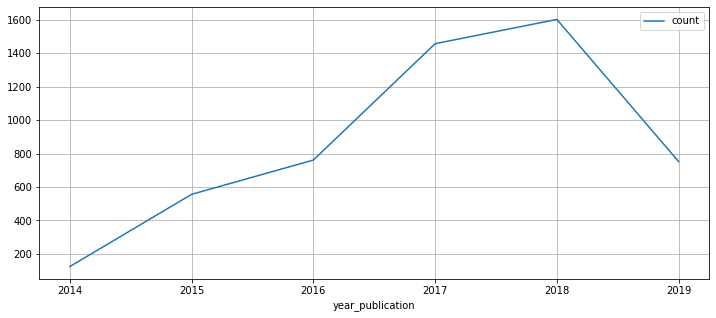

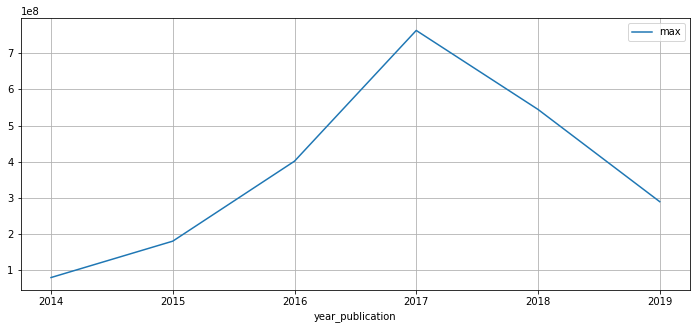

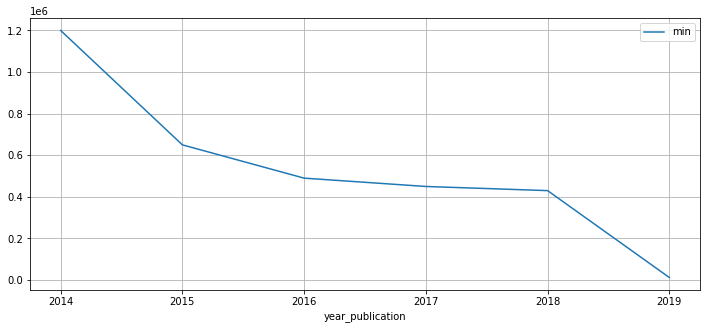

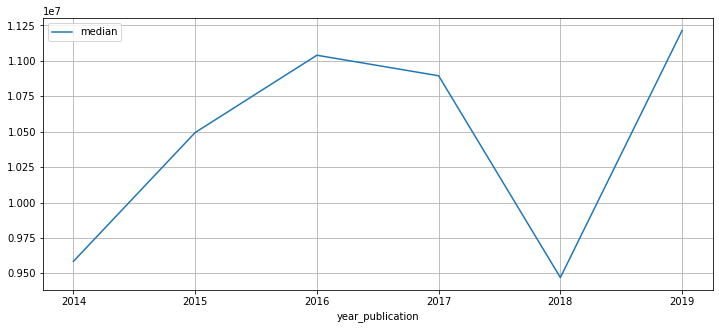

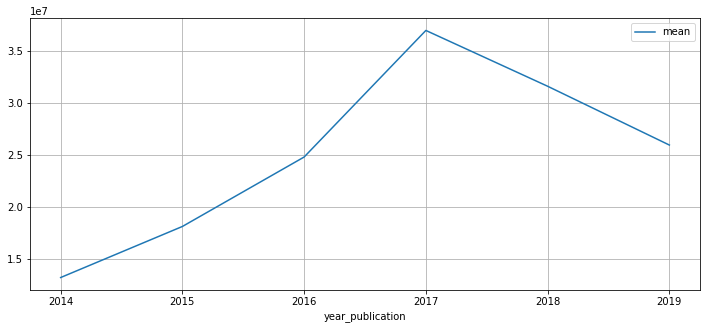

In [175]:
grouping_year_publication.plot(y = 'count', grid = True, figsize=(12, 5))
grouping_year_publication.plot(y = 'max', grid = True, figsize=(12, 5))
grouping_year_publication.plot(y = 'min', grid = True, figsize=(12, 5))
grouping_year_publication.plot(y = 'median', grid = True, figsize=(12, 5))
grouping_year_publication.plot(y = 'mean', grid = True, figsize=(12, 5))

In [176]:
data['last_price_rub'].corr(data['year_publication'])

-0.042927051076831486

**Цена практически никак не зависит от года публикации.**

### Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра.

In [177]:
data_locality_name = data.pivot_table(
    index = ['locality_name', ], values = 'square_meter_rub', aggfunc=['count', 'mean', 'median'])
data_locality_name.columns = ['count', 'mean', 'median']
data_locality_name = data_locality_name.sort_values('count', ascending=False).head(10)

In [178]:
print('10 населённых пунктах с наибольшим числом объявлений:\n\n', data_locality_name)

10 населённых пунктах с наибольшим числом объявлений:

                    count           mean    median
locality_name                                    
Санкт-Петербург    15721  114848.565231  104761.0
поселок Мурино       556   85681.305755   85878.0
поселок Шушары       440   78676.904545   76876.0
Всеволожск           398   68654.007538   65789.0
Пушкин               369  103125.373984  100000.0
Колпино              338   75424.150888   74723.5
поселок Парголово    327   90175.489297   91642.0
Гатчина              307   68745.693811   67796.0
деревня Кудрово      299   92473.086957   91860.0
Выборг               237   58141.489451   58158.0


<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Рейтинг топ-10 по городам получен

In [179]:
locality_name_max = data_locality_name[data_locality_name['median'] == data_locality_name['median'].max()]

In [180]:
print('Населённый пункт с самой высокой стоимостью квадратного метра:\n\n', locality_name_max)

Населённый пункт с самой высокой стоимостью квадратного метра:

                  count           mean    median
locality_name                                  
Санкт-Петербург  15721  114848.565231  104761.0


In [181]:
locality_name_min = data_locality_name[data_locality_name['median'] == data_locality_name['median'].min()]

In [182]:
print('Населённый пункт с самой высокой стоимостью квадратного метра:\n\n', locality_name_min)

Населённый пункт с самой высокой стоимостью квадратного метра:

                count          mean   median
locality_name                              
Выборг           237  58141.489451  58158.0


### Вычислим среднюю цену каждого километра до центра в Санкт-Петербурге. Опишим, как стоимость объектов зависит от расстояния до центра города.

In [183]:
data_to_city_centers_km = data.query('locality_name == "Санкт-Петербург"').pivot_table(
    index = ['to_city_centers_km'], values = 'square_meter_rub', aggfunc = ['count', 'mean', 'median'])
data_to_city_centers_km

,count,mean,median
,square_meter_rub,square_meter_rub,square_meter_rub
to_city_centers_km,,,
0,86,187323.674419,138536.5
1,240,166603.312500,123966.0
2,307,146662.420195,116363.0
3,526,129415.891635,110079.5
4,907,137475.039691,126086.0
5,769,146978.789337,126041.0
6,470,152277.455319,134117.0
7,407,141399.287469,125000.0


<AxesSubplot:xlabel='to_city_centers_km'>

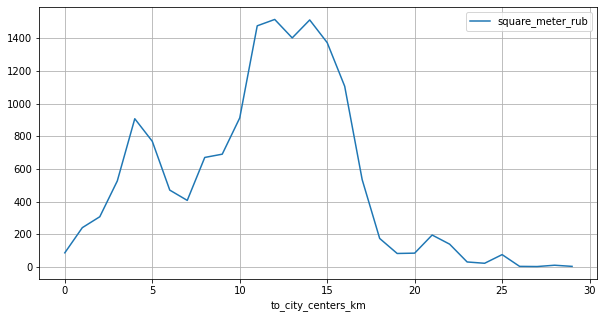

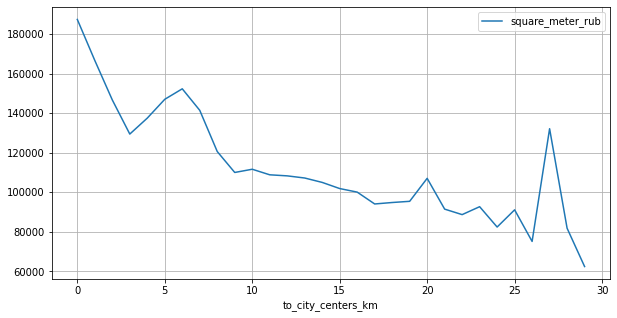

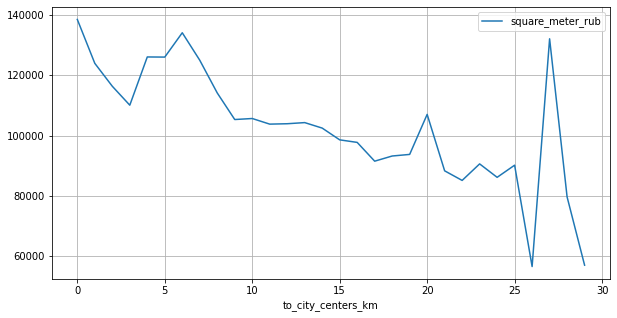

In [184]:
data_to_city_centers_km.plot(y = 'count', grid = True, figsize=(10, 5))
data_to_city_centers_km.plot(y = 'mean', grid = True, figsize=(10, 5))
data_to_city_centers_km.plot(y = 'median', grid = True, figsize=(10, 5))

#### Как видно из графиков и данных таблицы: за центр г. Санкт-Петербург можно принять круг радиусом примерно 6 км. с центром в исторической части города, например в  месте нахождения "Стрелки Васильевского острова", при этом чем ближе к центру объект недвижимости, тем выше стоимость его стоимость за квадратный метр.

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Очень информативные и хорошие графики. Ты прав, уже после 6-7 км цена перестает резко меняться. Это говорит нам о том, что примерно в это время заканчивается зона центра.

### Общий вывод

### Произведя предобработку входных данных и после проведенния иследовательского анализа данных можно сделать следующие выводы:

**Основное влияние на стоимость объектов недвижимоти оказывают следующие параметры:**

- в каком населенном пункте расположен объект недвижимости (самые дорогие объекты в г. Санкт-Петербург и г. Пушкин),

- размер общей площади объекта недвижимости,

- размер жилой площади объекта недвижимости,

- размер площади кухни объекта недвижимости,

- количество комнат,

- также в г. Санкт-Петеробурге - на стоимость объекта недвижимости влияет расстояние от него до центра г. Санкт-Петербург (чем ближе к центру Санкт-Петербурга, тем выше стоимость за квадратный метр),

- рассположение объекта недвижимости в непосредственной близости от парковой зоной

**В меньшей степени на стоимость объекта недвижимости влияют такие параметры как:**

- на каком этаже находится объект недвижимости - все этажи кроме 1-го и последнего оцениваются дороже,

- рассположение объекта недвижимости в непосредственной близости от парковой зоной,

- расположение объекта недвижимости в районе 30 км зоны от аэропорта

- количество этажей в доме.

Также установлено, возможно небольшое, сезонное увеличение стоимости объектов недвижимости в следующие месяцы: **февраль, март, апрель, октябрь и ноябрь.** В течении недели цена также может меняться: **в буднии дни возрастать, а по выходным падать**.

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Тот момент, когда итоговый вывод стал отличным дополнением проекта. С такими данными смело можем идти к заказчику и защищать результат. Я уверен, что у нас не будет проблем и мы сможем составить антифрод-систему. 

<div class="alert alert-block alert-info">

## Итоговый комментарии от ревьюера:
    
#### Успех

Спасибо большое тебе за такую качественную работу. Мне было приятно проверять проект и делиться обратной связью. Особенно впечатлила Предобработка данных. Все достаточно структурировано и последовательно. Ты применяешь верные навыки для работы с кодом. Еще хочу отметить понятные и информативные графики. Однако, в проекте есть несколько замечаний, которые надо исправить:

* Переделать замену некоторых пропусков. 
* Убрать на графиках и при подсчетах значения-заглушки
* Найти и пояснить выбивающиеся значения на графике по дням в публикации.
* Убрать подсчет корреляции для некоторых графиков.
       
Еще я оставил рекомендации. Очень надеюсь, что ты учтешь их в этом и последующих проектах.
       
Жду проект после доработки. Уверен, ты справишься.
</div>

<div class="alert alert-info">
<b> Комментарий студента: </b> 
    
   Вячелав, Добрый день!
    
    Большое спасибо за быстрый отзыв и Ваш положительный комментарий! 
    
    Ваши замечания устранены. 
        
    Рекомендации, связанные с автоматизацией замены и логической сортировкой по месяцам и др. еще разбираю, если позволите, буду учитывать в следующих проектах.
</div>



**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод